# Data Analysis and Cleaning
analysis data and do some dirty work for cleaning
- <a href='#1'>1. data preprocess</a> 
- <a href='#2'>2. show features different between train and test</a> 
- <a href='#3'>3. show feature distribution between normal and fault disks</a>
- <a href='#4'>4. check the correlation between feature and targets</a>

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os 
import gc
from time import time 
from datetime import timedelta, datetime
import base64

import pandas as pd
from IPython.core.display import display, HTML
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import ks_2samp
from pandas_profiling import ProfileReport

sys.path.append('../')
import conf
from utils import (
    check_columns, 
    check_nan_value, 
    correct_column_type, 
    plot_dist_of_cols,
    remove_cont_cols_with_unique_value,
)

In [2]:
# global settings
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',100)
sns.set(rc={'figure.figsize':(20,10)})
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
# global variables
DEFAULT_MISSING_FLOAT = 0
FAULT_TAG = 1

In [4]:
# functions
def __dummy():
    pass

def diivide_files_into_raw_and_normalized():
    pass

### <a id='1'> 1.Data Preprocess</a>

In [1]:
l = [1,2]
l = iter(l)

In [ ]:
train_fe_df = pd.read_hdf(os.path.join(conf.DATA_DIR,'data_2018_all.h5'))

In [7]:
test_fe_df = pd.read_hdf(os.path.join(conf.DATA_DIR,'data_201808_test_all.h5'))

In [8]:
train_test_df = pd.concat([train_fe_df, test_fe_df])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
train_fe_df.loc[train_fe_df.tag!=0,'tag'] = 1

In [10]:
index_cols, cate_cols, cont_cols, label_cols = check_columns(train_fe_df.dtypes.to_dict())

In [11]:
train_fe_df.head()

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_184_normalized,smart_187_normalized,smart_188_normalized,smart_189_normalized,smart_190_normalized,smart_191_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_195_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,tag,flag,30_day,smart_1raw,smart_3raw,smart_4raw,smart_5raw,smart_7raw,smart_9raw,smart_10raw,smart_12raw,smart_184raw,smart_187raw,smart_188raw,smart_189raw,smart_190raw,smart_191raw,smart_192raw,smart_193raw,smart_194raw,smart_195raw,smart_197raw,smart_198raw,smart_199raw
0,disk_21087,A,1,2018-01-01,80.0,96.0,100.0,100.0,84.0,89.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,25.0,63.0,100.0,100.0,200.0,0,0,0,104629728.0,0.0,23.0,0.0,3.062229e+08,10483.0,0.0,23.0,0.0,0.0,0.0,0.0,25.0,0.0,21.0,505.0,25.0,104629728.0,0.0,0.0,0.0
1,disk_69256,A,2,2018-01-01,84.0,86.0,100.0,100.0,93.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,64.0,99.0,100.0,100.0,36.0,15.0,100.0,100.0,200.0,0,0,0,232161968.0,0.0,104.0,0.0,1.817807e+09,3433.0,0.0,104.0,0.0,0.0,0.0,0.0,36.0,2114.0,8.0,438.0,36.0,232161968.0,0.0,0.0,0.0
2,disk_41304,A,1,2018-01-01,81.0,96.0,100.0,100.0,93.0,67.0,100.0,100.0,100.0,100.0,100.0,100.0,65.0,100.0,100.0,100.0,35.0,24.0,100.0,100.0,200.0,0,0,0,150906496.0,0.0,9.0,0.0,2.096764e+09,29782.0,0.0,9.0,0.0,0.0,0.0,0.0,35.0,0.0,8.0,1249.0,35.0,150906496.0,0.0,0.0,0.0
3,disk_73081,A,2,2018-01-01,83.0,88.0,100.0,100.0,71.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,66.0,100.0,100.0,100.0,34.0,12.0,100.0,100.0,200.0,0,0,0,189932672.0,0.0,12.0,0.0,1.232626e+07,234.0,0.0,12.0,0.0,0.0,0.0,0.0,34.0,116.0,7.0,41.0,34.0,189932672.0,0.0,0.0,0.0
4,disk_9590,A,1,2018-01-01,68.0,97.0,100.0,100.0,60.0,83.0,100.0,100.0,100.0,100.0,100.0,100.0,73.0,100.0,100.0,100.0,27.0,12.0,100.0,100.0,200.0,0,0,0,6786815.0,0.0,6.0,0.0,1.259635e+06,15019.0,0.0,6.0,0.0,0.0,0.0,0.0,27.0,0.0,5.0,708.0,27.0,6786815.0,0.0,0.0,0.0


In [12]:
train_fe_df.dtypes

serial_number                   object
manufacturer                    object
model                             int8
dt                      datetime64[ns]
smart_1_normalized             float32
smart_3_normalized             float32
smart_4_normalized             float32
smart_5_normalized             float32
smart_7_normalized             float32
smart_9_normalized             float32
smart_10_normalized            float32
smart_12_normalized            float32
smart_184_normalized           float32
smart_187_normalized           float32
smart_188_normalized           float32
smart_189_normalized           float32
smart_190_normalized           float32
smart_191_normalized           float32
smart_192_normalized           float32
smart_193_normalized           float32
smart_194_normalized           float32
smart_195_normalized           float32
smart_197_normalized           float32
smart_198_normalized           float32
smart_199_normalized           float32
tag                      

In [13]:
cate_cols

['manufacturer']

In [ ]:
# # data preprocess
# correct_column_type(train_fe_df)
# correct_column_type(test_fe_df)
# index_cols, cate_cols, cont_cols, label_cols = check_columns(train_fe_df.dtypes.to_dict())

# drop_na_cols = check_nan_value(train_fe_df)
# train_fe_df.drop(columns=drop_na_cols, inplace=True)
# test_fe_df.drop(columns=drop_na_cols, inplace=True)

# train_fe_df.drop_duplicates(index_cols, keep='first',inplace=True)
# test_fe_df.drop_duplicates(index_cols, keep='first', inplace=True)


# cols_with_unique_number = remove_cont_cols_with_unique_value(train_fe_df, 
#                                                              test_fe_df, 
#                                                              cont_cols,
#                                                              threshold=3)


# train_fe_df.drop(columns=cols_with_unique_number, inplace=True)
# test_fe_df.drop(columns=cols_with_unique_number, inplace=True)



In [9]:
# show the records of each month
train_test_df['month'] = train_test_df['dt'].dt.month.astype(np.int8)

In [10]:
train_test_tmp_df = train_test_df[['month','serial_number','model']]

In [11]:
train_test_temp_group = train_test_tmp_df.groupby('month')

In [12]:
train_test_temp_group['month'].agg(lambda x:len(x))

month
1    4428250
2    4083441
3    4566413
4    4463347
5    4647989
6    4647434
7    4855732
8     178232
Name: month, dtype: int64

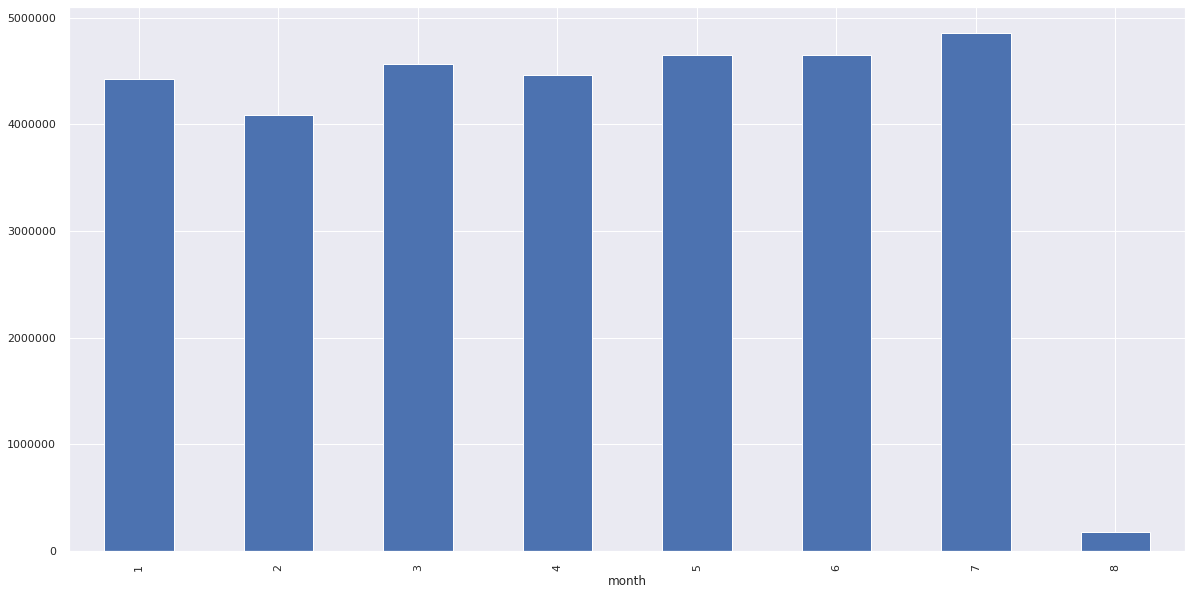

In [13]:
train_test_temp_group['month'].agg(lambda x:len(x)).plot(kind='bar')

In [48]:
# show the fault record records of each month of each model type
def plot_each_month_fault_disk_num_with_model_id():
#     train_fe_df_model_one = train_fe_df[train_fe_df.model==model_id]
    train_fe_df['month'] = train_fe_df['dt'].dt.month.astype(np.int8)
    train_temp_df  = train_fe_df[['month','flag','model']]
    train_temp_group = train_temp_df.groupby(['month'])
    temp_model_one = pd.Series(train_temp_group.apply(lambda x: len(x[(x.flag==1) & (x.model==1)])))
    temp_model_two = pd.Series(train_temp_group.apply(lambda x: len(x[(x.flag==1) & (x.model==2)])))
    df = pd.DataFrame({"model_one":temp_model_one,"model_two":temp_model_two})
    print(df)
    ax = df.plot.bar( rot=0, title="each model's fault_disks in each month")
    ax.set_xlabel("month")
    ax.set_ylabel("num_fault_disks")
    plt.show()

       model_one  model_two
month                      
1             55         58
2             47         43
3             61         40
4             55         48
5             46         44
6             63         57
7             59         72


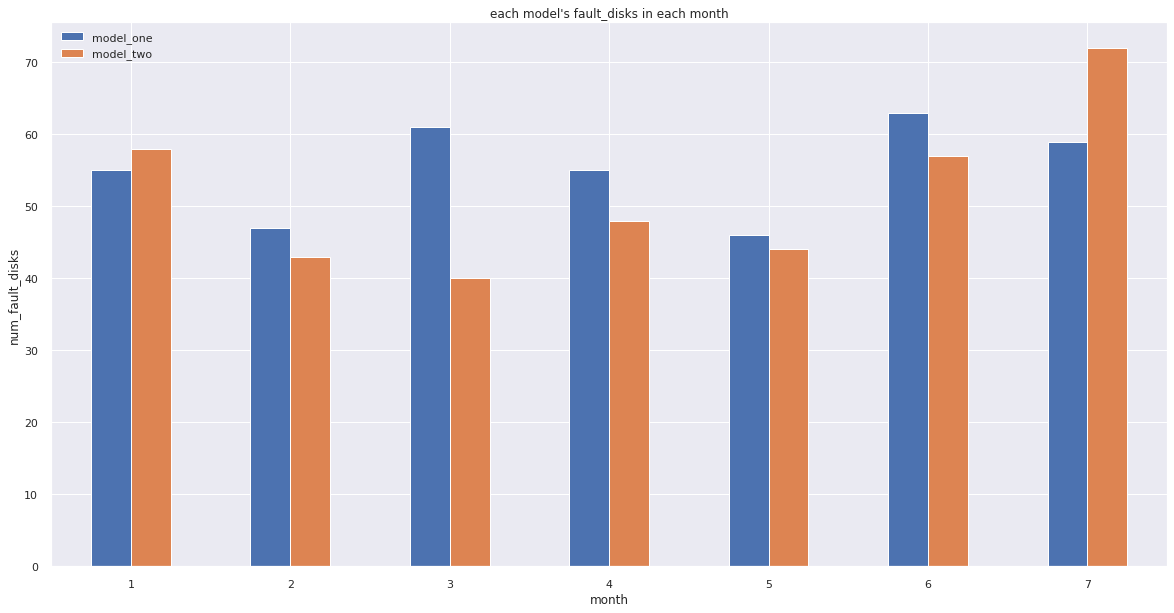

In [49]:
plot_each_month_fault_disk_num_with_model_id()

In [23]:
# show the smart_9raw realtion with fault disk
tmp_df = train_fe_df[index_cols + ['smart_9raw'] + label_cols]

In [24]:
tmp_df.head()

,serial_number,model,dt,smart_9raw,tag,flag,30_day
0,disk_21087,1,2018-01-01,10483.0,0,0,0
1,disk_69256,2,2018-01-01,3433.0,0,0,0
2,disk_41304,1,2018-01-01,29782.0,0,0,0
3,disk_73081,2,2018-01-01,234.0,0,0,0
4,disk_9590,1,2018-01-01,15019.0,0,0,0


In [25]:
tmp_df['smart_9raw_in_day_unit'] = tmp_df['smart_9raw']//24

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
tmp_df.head()

,serial_number,model,dt,smart_9raw,tag,flag,30_day,smart_9raw_in_day_unit
0,disk_21087,1,2018-01-01,10483.0,0,0,0,436.0
1,disk_69256,2,2018-01-01,3433.0,0,0,0,143.0
2,disk_41304,1,2018-01-01,29782.0,0,0,0,1240.0
3,disk_73081,2,2018-01-01,234.0,0,0,0,9.0
4,disk_9590,1,2018-01-01,15019.0,0,0,0,625.0


<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9raw_in_day_unit distirbution against flag')

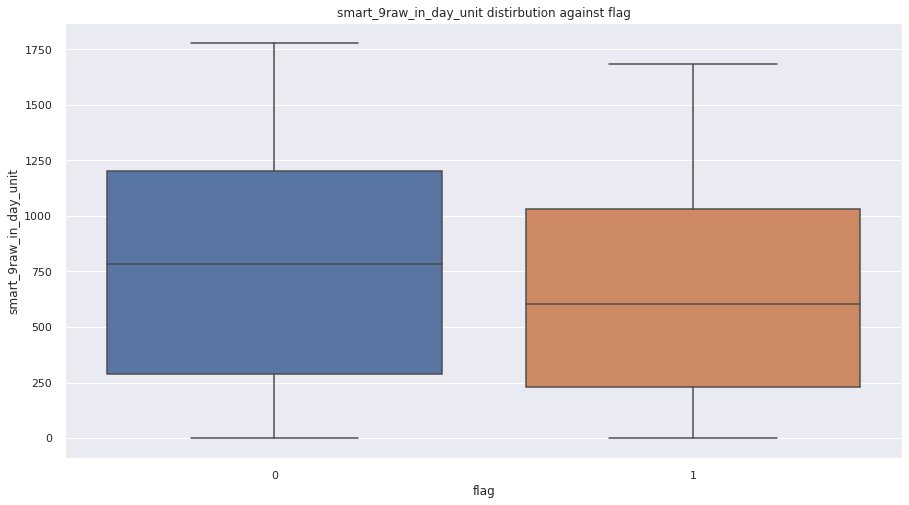

In [28]:
tmp_df = tmp_df[['smart_9raw_in_day_unit','flag']]
plt.figure(figsize=(15,8))
sns.boxplot(x='flag', y='smart_9raw_in_day_unit',  data=tmp_df)
plt.title('%s distirbution against flag' % 'smart_9raw_in_day_unit')
plt.show()

In [22]:
# show how many records each disk has
tmp_df = train_test_df[['model','serial_number','dt']]

In [25]:
mask = tmp_df.model==1

In [26]:
model_one_tmp_df = tmp_df[mask]

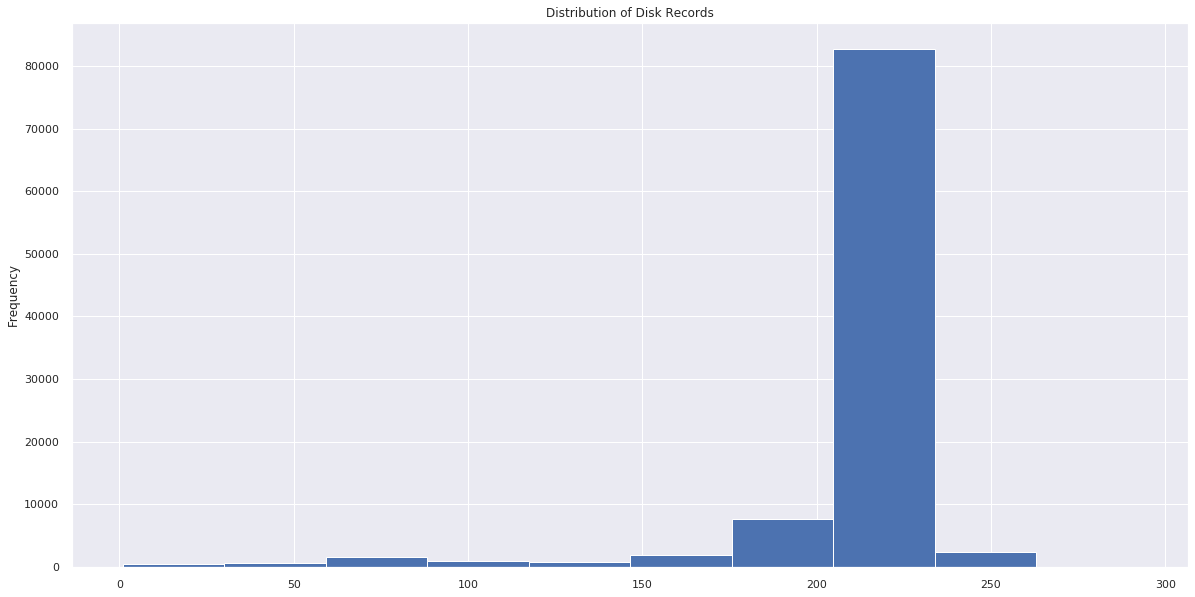

In [27]:
model_one_tmp_df.groupby(['model','serial_number']).apply(lambda x:len(x)).plot(kind='hist', title='Distribution of Disk Records')

In [39]:
print(model_one_tmp_df.groupby(['model','serial_number']).apply(lambda x:len(x)))

model  serial_number
1      disk_0           204
       disk_10          216
       disk_100         209
       disk_1000        204
       disk_10000       196
                       ... 
       disk_9999        207
       disk_99991        82
       disk_99992       199
       disk_99994       211
       disk_99996       210
Length: 98856, dtype: int64


### <a id='2'> 2.show feature difference between normal and fault</a>

In [41]:
index_cols, cate_cols, cont_cols, label_cols = check_columns(train_test_df.dtypes.to_dict())

In [ ]:
temp_fault_df = train_fe_df[train_fe_df.flag==1]
temp_normal_df = train_fe_df[train_fe_df.flag==0]

In [ ]:
mask = train_fe_df.serial_number.isin(temp_normal_df.serial_number)
mask &= train_fe_df.model.isin(temp_normal_df.model)
train_normal_df = train_fe_df[mask]

In [ ]:
mask = train_fe_df.serial_number.isin(temp_fault_df.serial_number)
mask &= train_fe_df.model.isin(temp_fault_df.model)
train_fault_df = train_fe_df[mask]

In [ ]:
train_normal_df.head()

In [ ]:
train_fault_df.head()

In [ ]:
group_cols = ['model', 'serial_number']
train_fault_sub_dfs = dict(tuple(train_fault_df.groupby(group_cols)))
train_normal_sub_dfs = dict(tuple(train_normal_df.groupby(group_cols)))

In [ ]:
for cont_col in cont_cols: 
#     train_fault_sub_dfs[(1, 'disk_100111')][[cont_col,'dt']].set_index('dt').plot()
#     train_fault_sub_dfs[(1, 'disk_58415')][[cont_col,'dt']].set_index('dt').plot()
    ax1 = plt.plot(train_fault_sub_dfs[(1, 'disk_100111')]['dt'], 
                   train_fault_sub_dfs[(1, 'disk_100111')][cont_col],
                   label='disk_100111')
    ax2 = plt.plot(train_fault_sub_dfs[(1, 'disk_58415')]['dt'],
                   train_fault_sub_dfs[(1, 'disk_58415')][cont_col],
                   label='disk_58415')
    ax3 = plt.plot(train_normal_sub_dfs[(1, 'disk_21087')]['dt'],
                   train_normal_sub_dfs[(1, 'disk_21087')][cont_col],
                   label='disk_21087')
    plt.legend()
    plt.ylabel(cont_col)
    plt.xlabel('dt')
    plt.show()
# ax.set_ylabel(train_fault_sub_dfs[(1, 'disk_100111')]['month'])

In [ ]:
group_cols = ['model', 'serial_number']
train_sub_dfs = dict(tuple(train_fe_df.groupby(group_cols)))
train_fault_sub_dfs = dict(tuple(fault_df.groupby(group_cols)))
train_normal_sub_dfs = dict(tuple(normal_df.groupby(group_cols)))

### <a id='3'> 3. show feature distribution between normal and fault disks</a>

In [23]:
train_fe_df.head()

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_184_normalized,smart_187_normalized,smart_188_normalized,smart_189_normalized,smart_190_normalized,smart_191_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_195_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,tag,flag,30_day,smart_1raw,smart_3raw,smart_4raw,smart_5raw,smart_7raw,smart_9raw,smart_10raw,smart_12raw,smart_184raw,smart_187raw,smart_188raw,smart_189raw,smart_190raw,smart_191raw,smart_192raw,smart_193raw,smart_194raw,smart_195raw,smart_197raw,smart_198raw,smart_199raw
0,disk_21087,A,1,2018-01-01,80.0,96.0,100.0,100.0,84.0,89.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,25.0,63.0,100.0,100.0,200.0,0,0,0,104629728.0,0.0,23.0,0.0,3.062229e+08,10483.0,0.0,23.0,0.0,0.0,0.0,0.0,25.0,0.0,21.0,505.0,25.0,104629728.0,0.0,0.0,0.0
1,disk_69256,A,2,2018-01-01,84.0,86.0,100.0,100.0,93.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,64.0,99.0,100.0,100.0,36.0,15.0,100.0,100.0,200.0,0,0,0,232161968.0,0.0,104.0,0.0,1.817807e+09,3433.0,0.0,104.0,0.0,0.0,0.0,0.0,36.0,2114.0,8.0,438.0,36.0,232161968.0,0.0,0.0,0.0
2,disk_41304,A,1,2018-01-01,81.0,96.0,100.0,100.0,93.0,67.0,100.0,100.0,100.0,100.0,100.0,100.0,65.0,100.0,100.0,100.0,35.0,24.0,100.0,100.0,200.0,0,0,0,150906496.0,0.0,9.0,0.0,2.096764e+09,29782.0,0.0,9.0,0.0,0.0,0.0,0.0,35.0,0.0,8.0,1249.0,35.0,150906496.0,0.0,0.0,0.0
3,disk_73081,A,2,2018-01-01,83.0,88.0,100.0,100.0,71.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,66.0,100.0,100.0,100.0,34.0,12.0,100.0,100.0,200.0,0,0,0,189932672.0,0.0,12.0,0.0,1.232626e+07,234.0,0.0,12.0,0.0,0.0,0.0,0.0,34.0,116.0,7.0,41.0,34.0,189932672.0,0.0,0.0,0.0
4,disk_9590,A,1,2018-01-01,68.0,97.0,100.0,100.0,60.0,83.0,100.0,100.0,100.0,100.0,100.0,100.0,73.0,100.0,100.0,100.0,27.0,12.0,100.0,100.0,200.0,0,0,0,6786815.0,0.0,6.0,0.0,1.259635e+06,15019.0,0.0,6.0,0.0,0.0,0.0,0.0,27.0,0.0,5.0,708.0,27.0,6786815.0,0.0,0.0,0.0


<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1_normalized distirbution against flag')

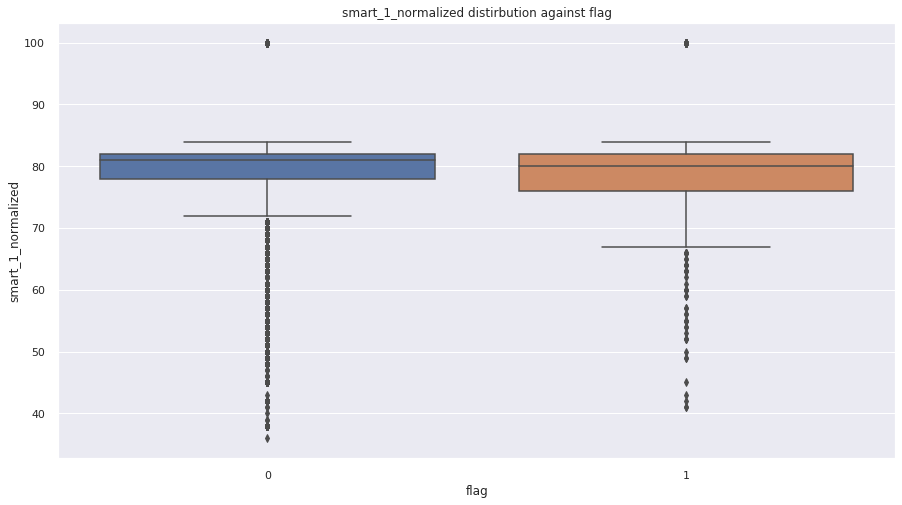

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3_normalized distirbution against flag')

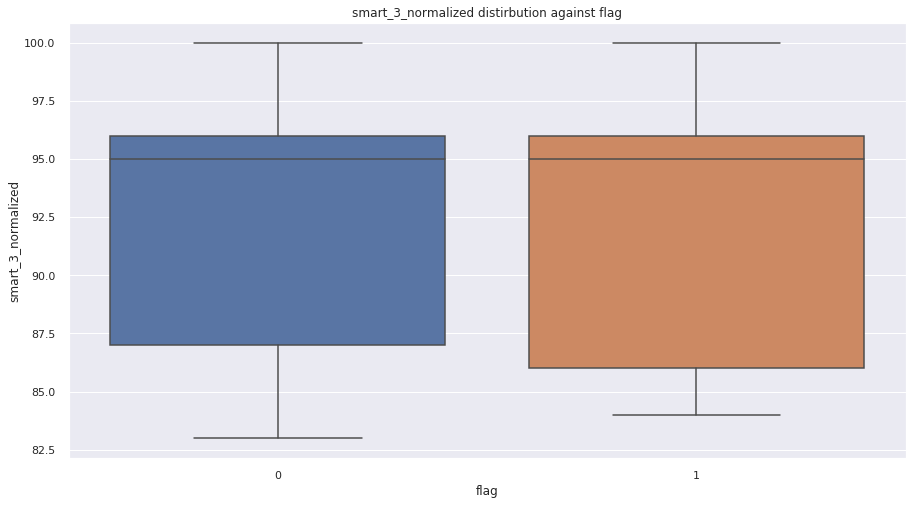

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4_normalized distirbution against flag')

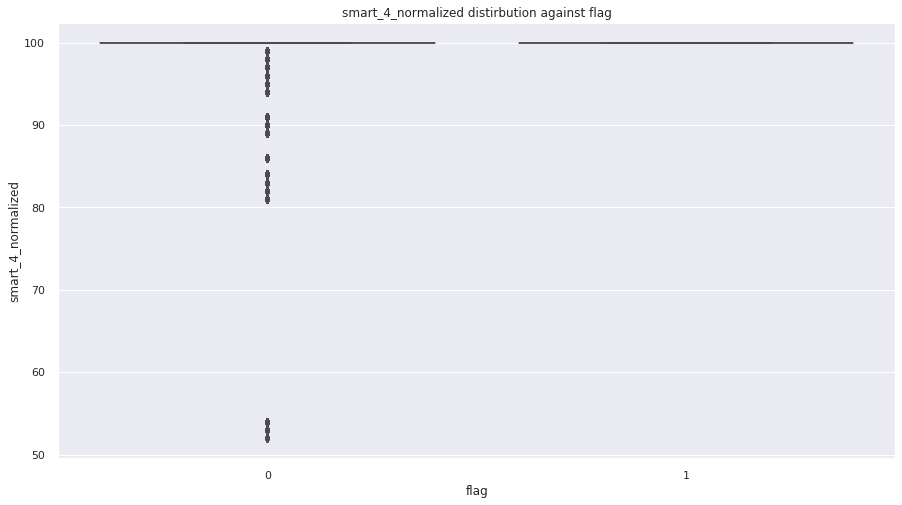

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5_normalized distirbution against flag')

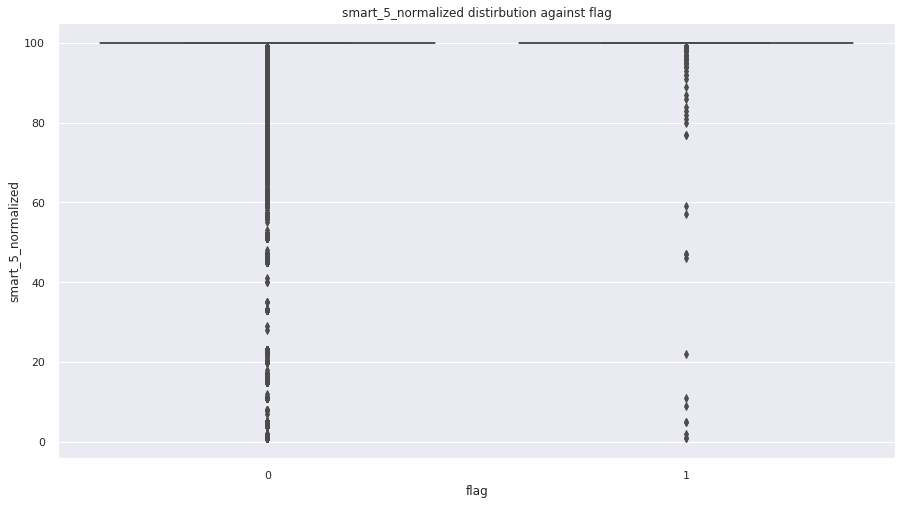

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7_normalized distirbution against flag')

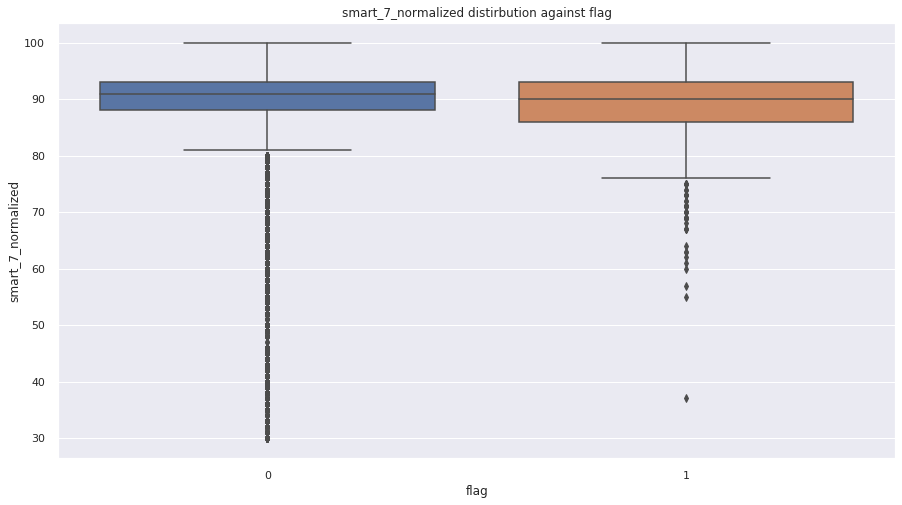

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9_normalized distirbution against flag')

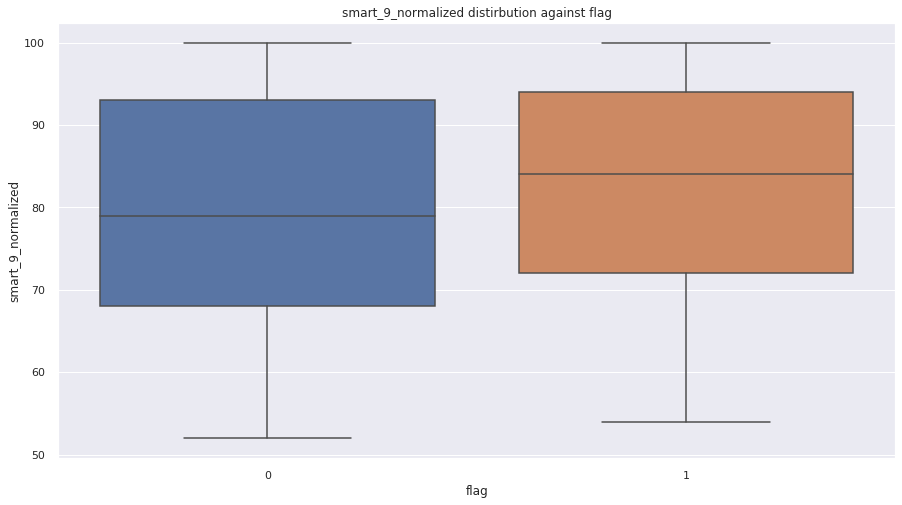

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10_normalized distirbution against flag')

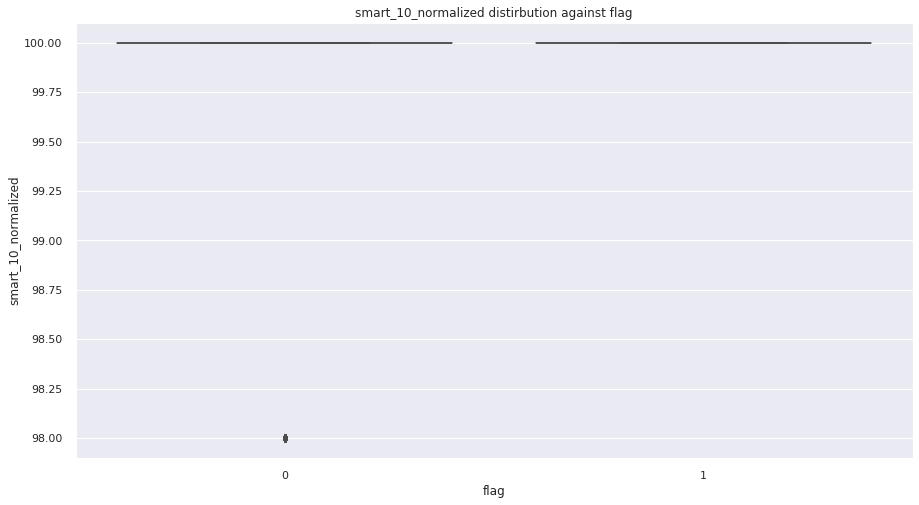

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12_normalized distirbution against flag')

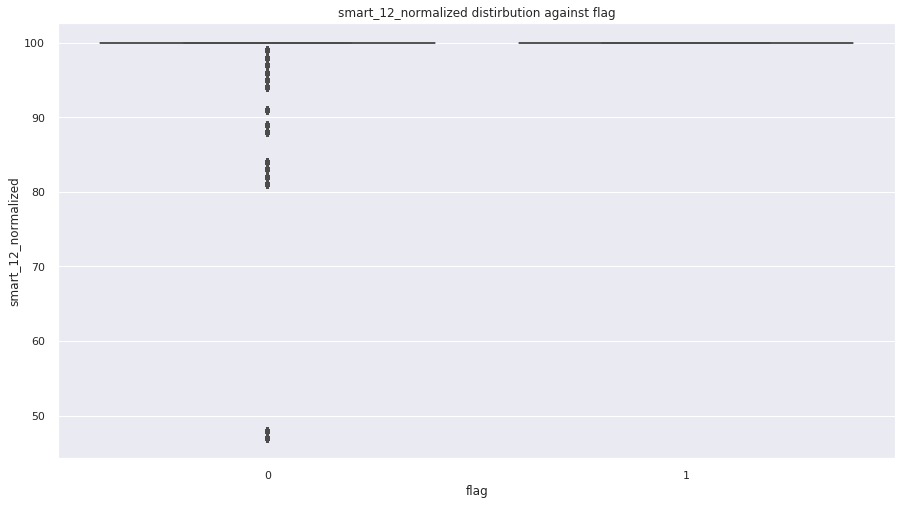

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184_normalized distirbution against flag')

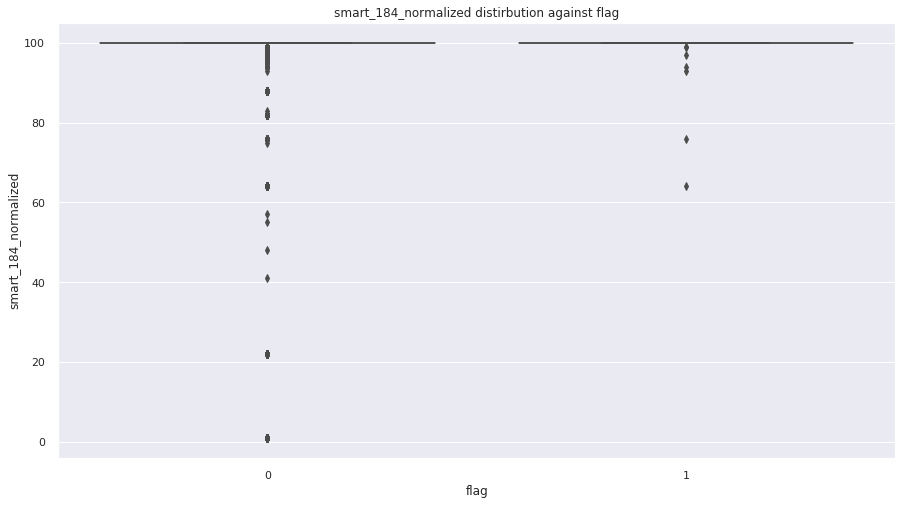

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187_normalized distirbution against flag')

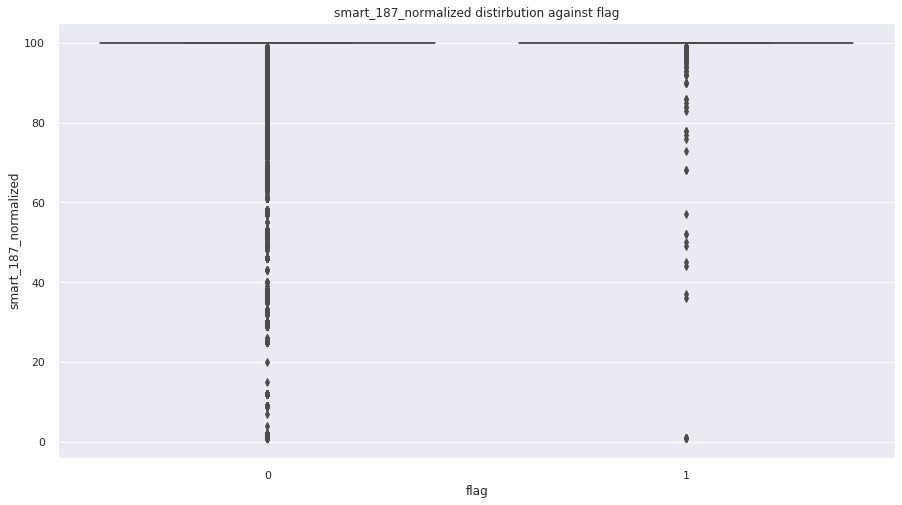

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188_normalized distirbution against flag')

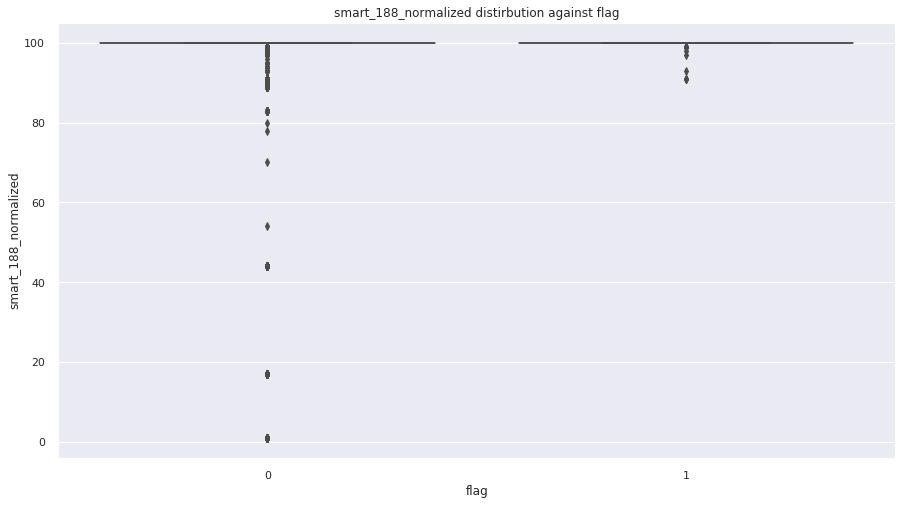

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189_normalized distirbution against flag')

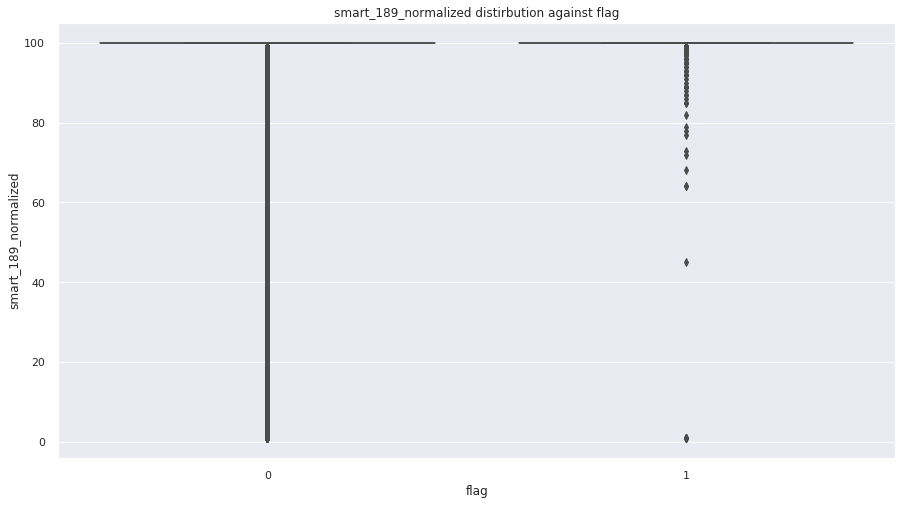

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190_normalized distirbution against flag')

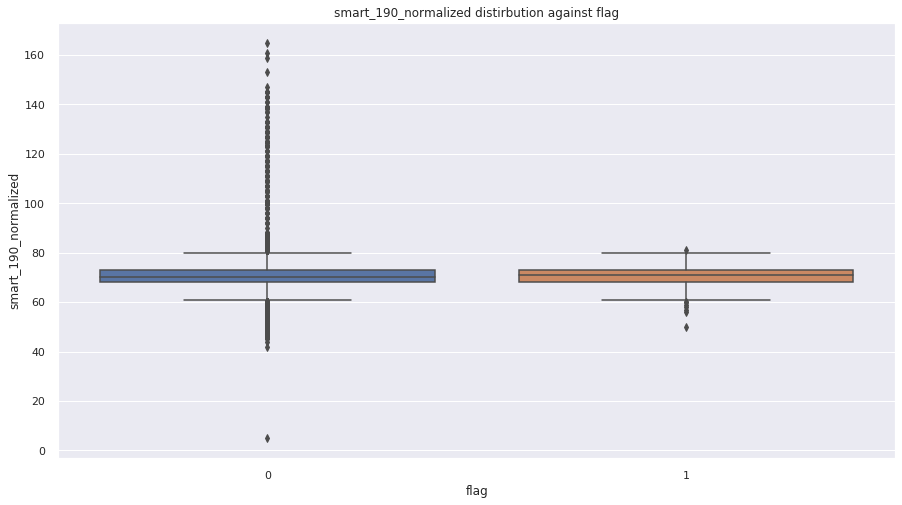

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191_normalized distirbution against flag')

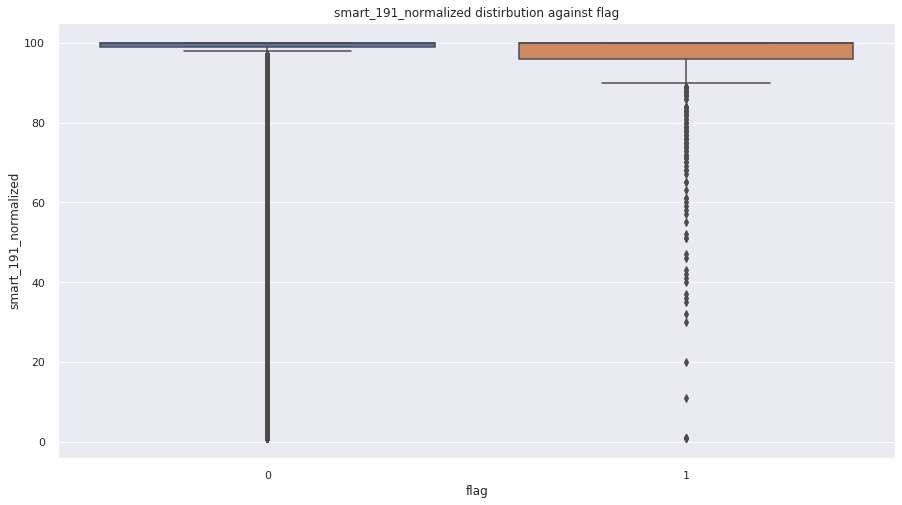

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192_normalized distirbution against flag')

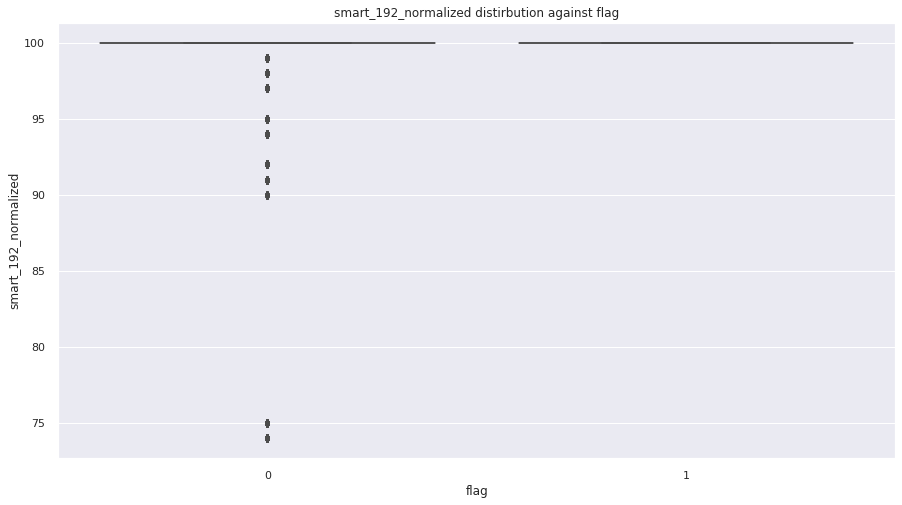

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193_normalized distirbution against flag')

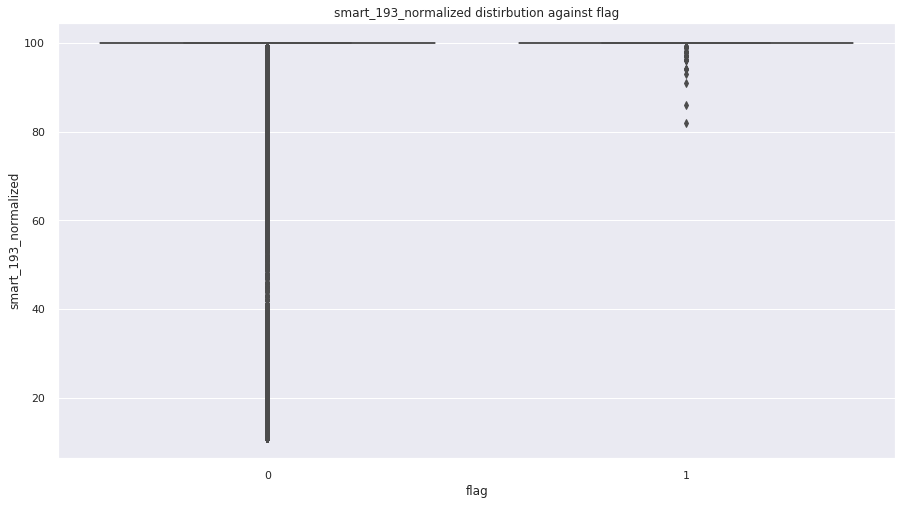

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194_normalized distirbution against flag')

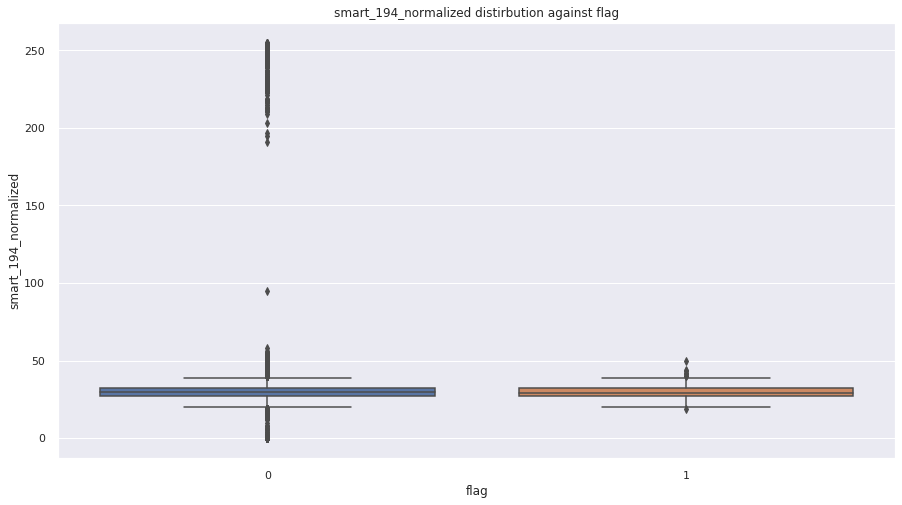

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195_normalized distirbution against flag')

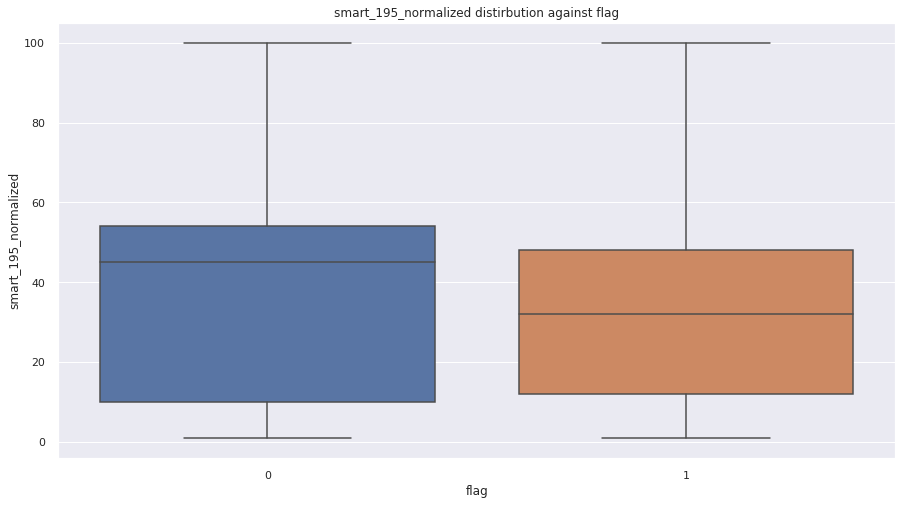

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197_normalized distirbution against flag')

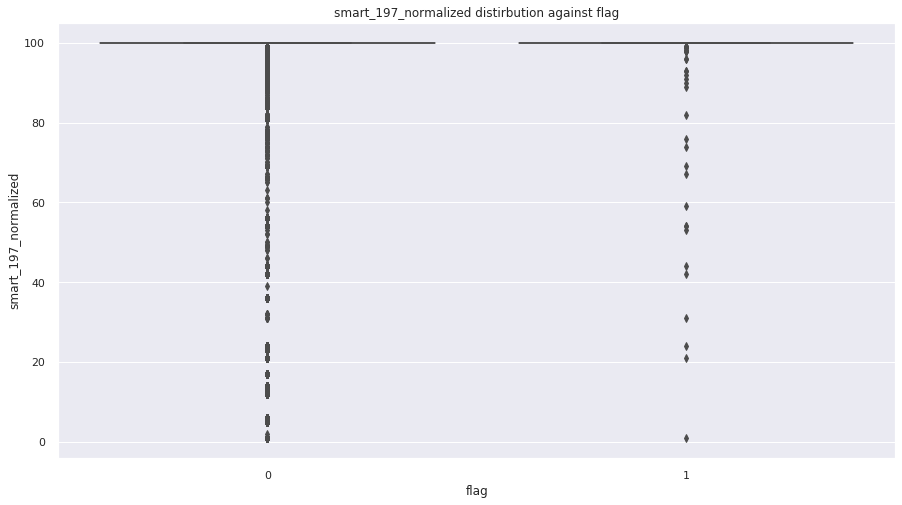

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198_normalized distirbution against flag')

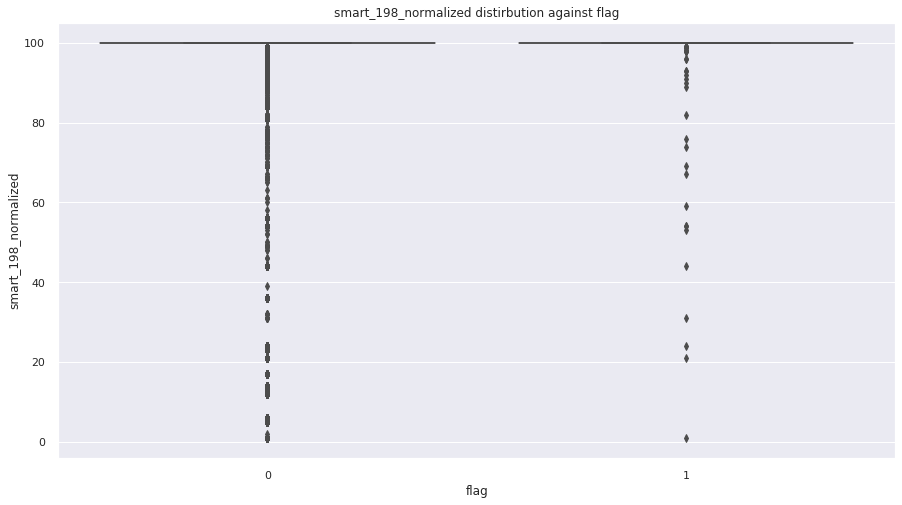

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199_normalized distirbution against flag')

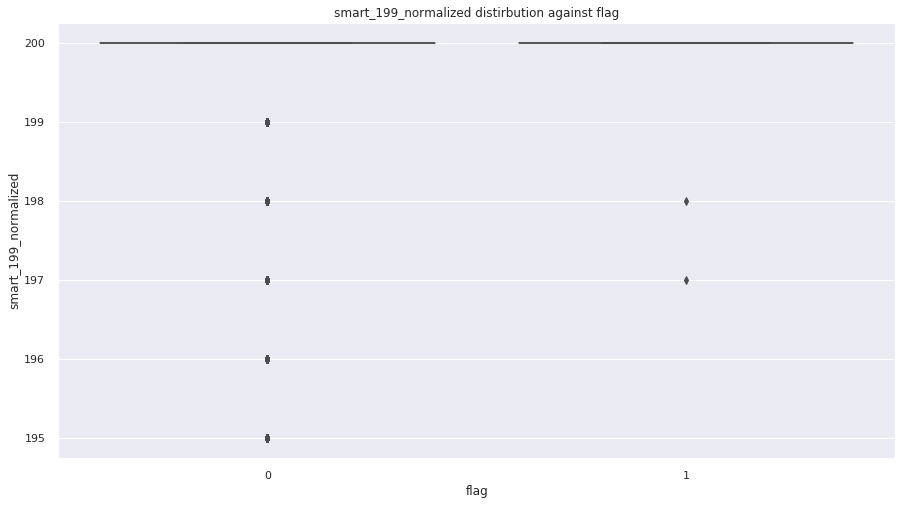

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1raw distirbution against flag')

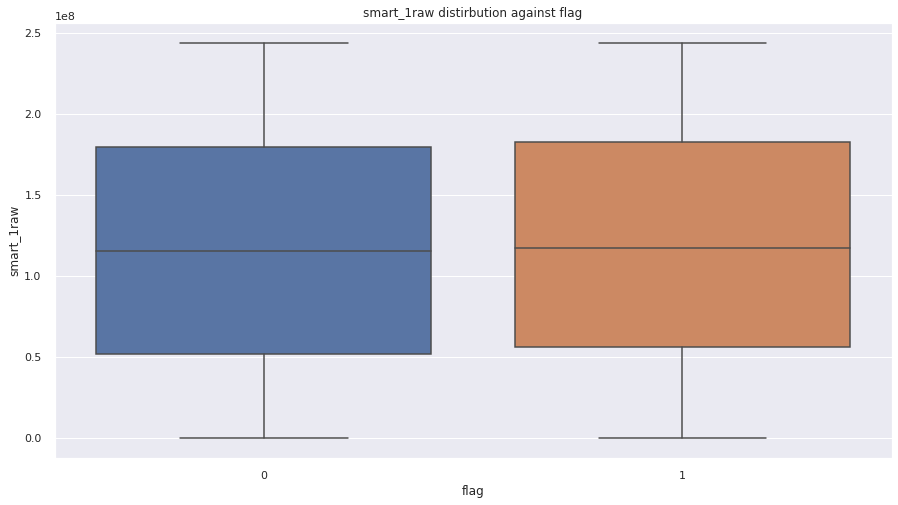

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3raw distirbution against flag')

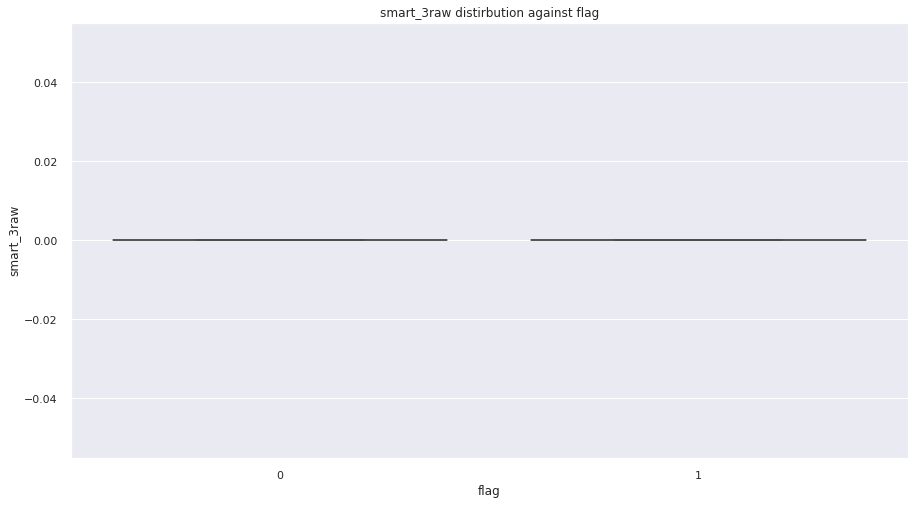

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4raw distirbution against flag')

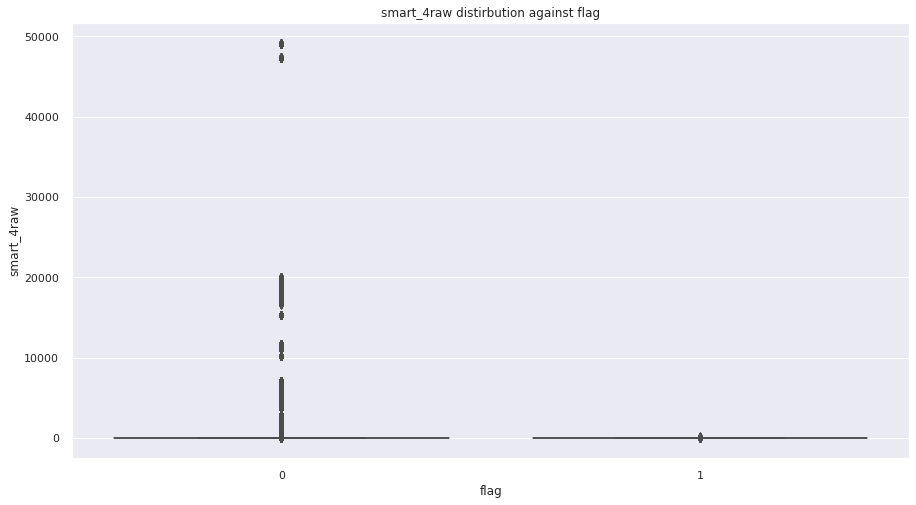

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5raw distirbution against flag')

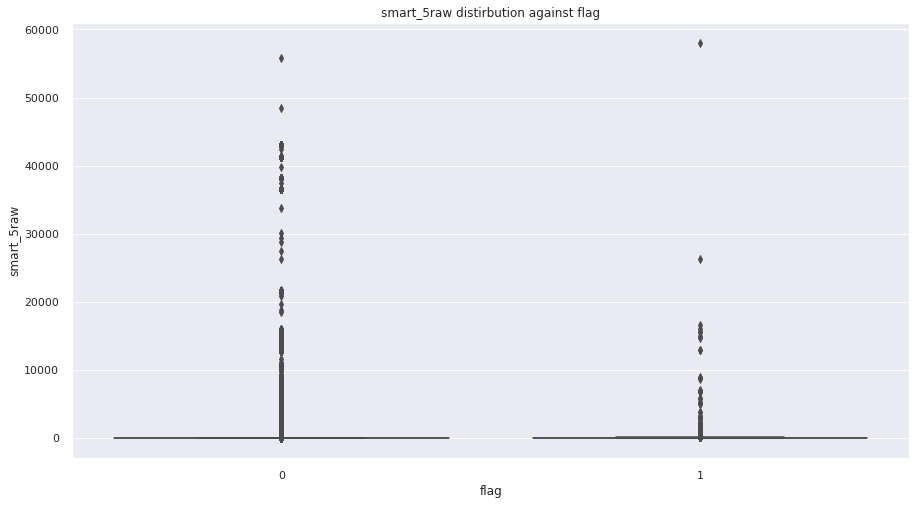

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7raw distirbution against flag')

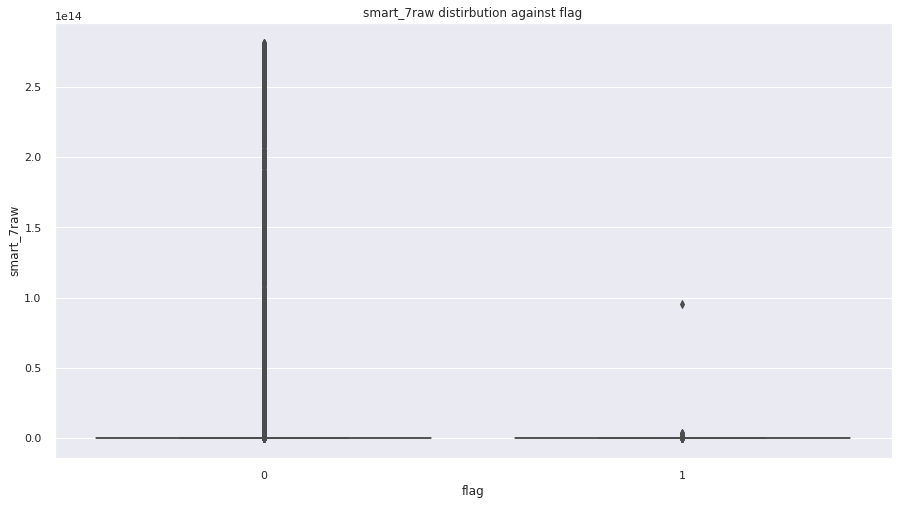

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9raw distirbution against flag')

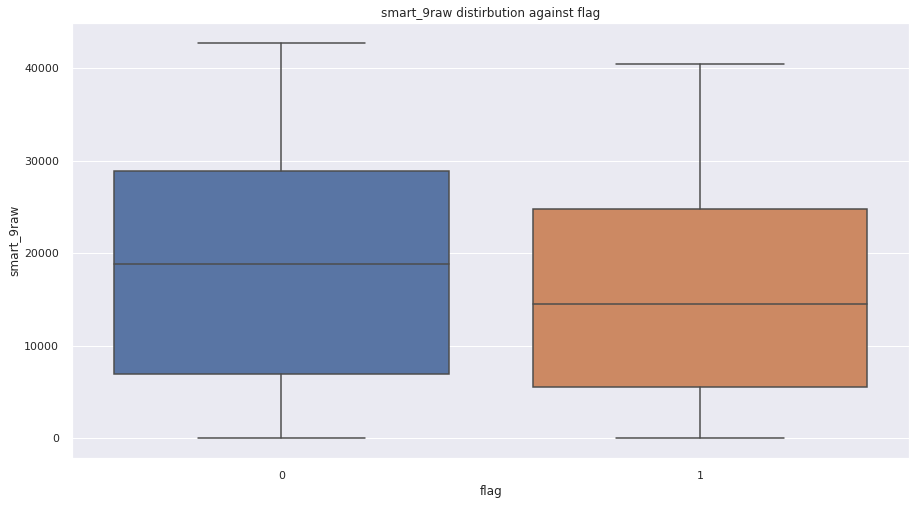

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10raw distirbution against flag')

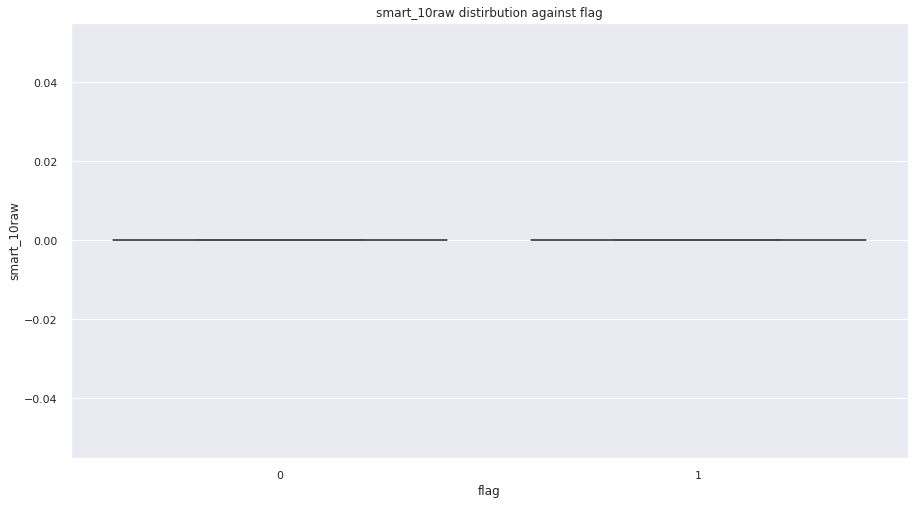

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12raw distirbution against flag')

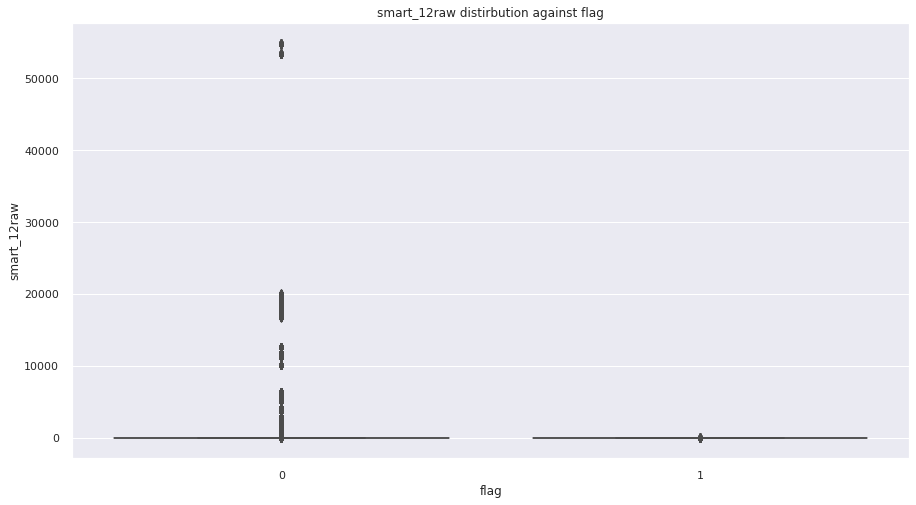

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184raw distirbution against flag')

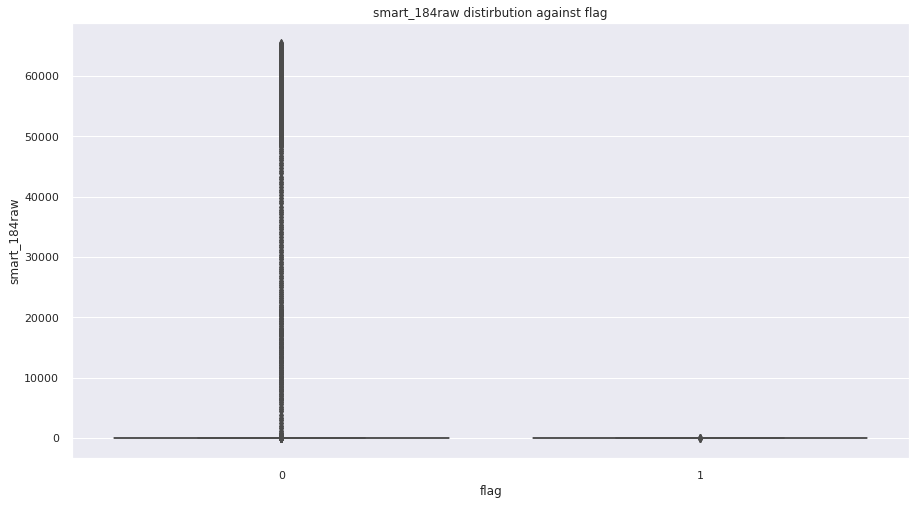

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187raw distirbution against flag')

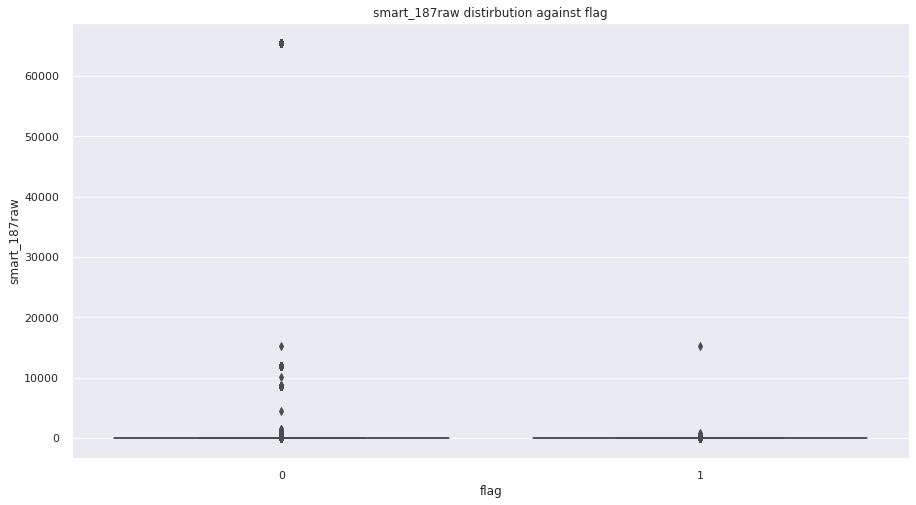

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188raw distirbution against flag')

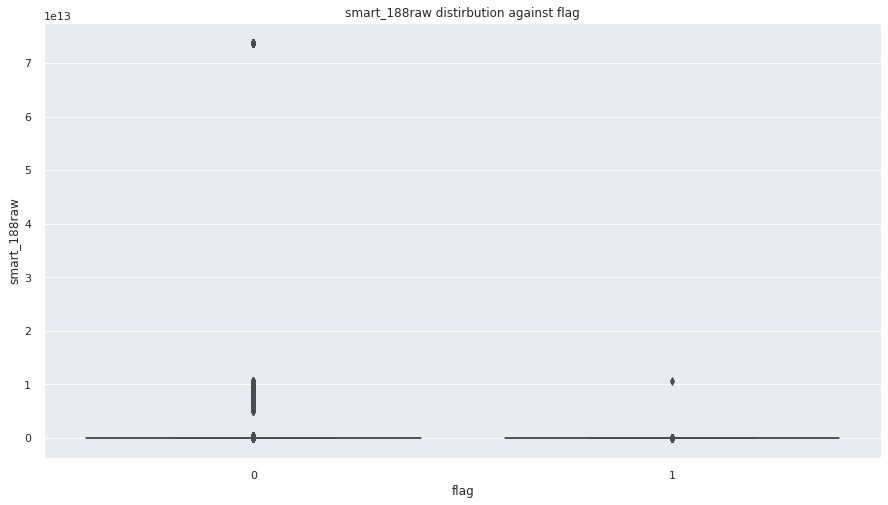

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189raw distirbution against flag')

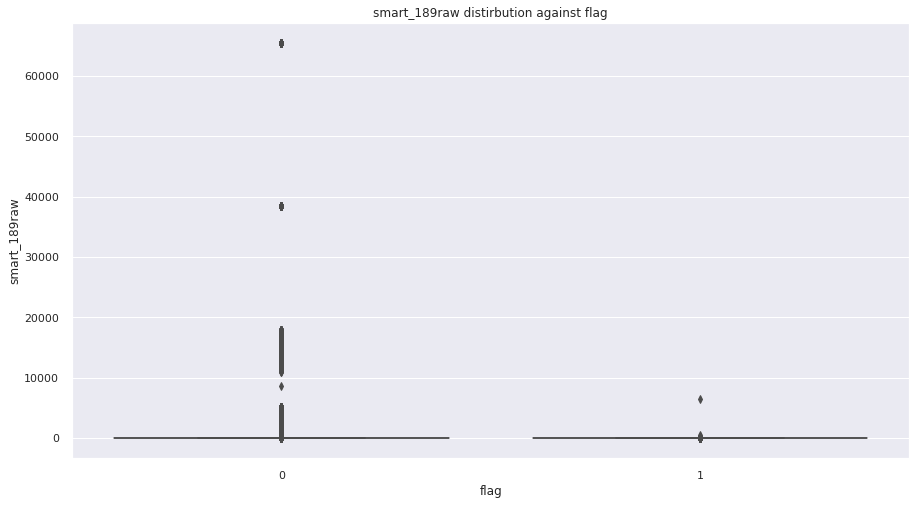

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190raw distirbution against flag')

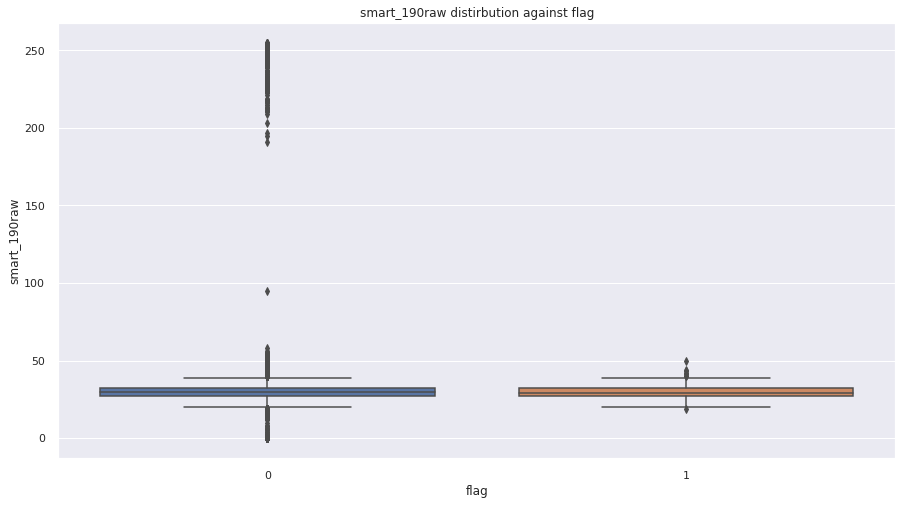

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191raw distirbution against flag')

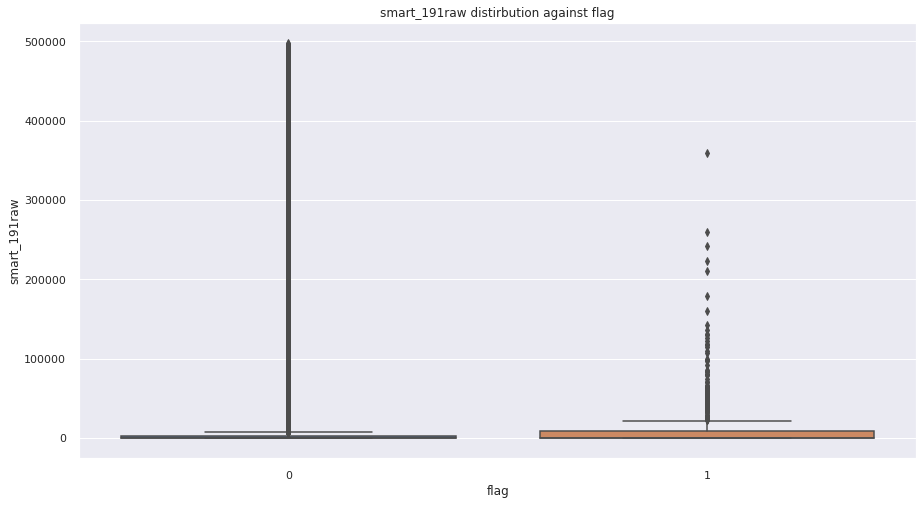

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192raw distirbution against flag')

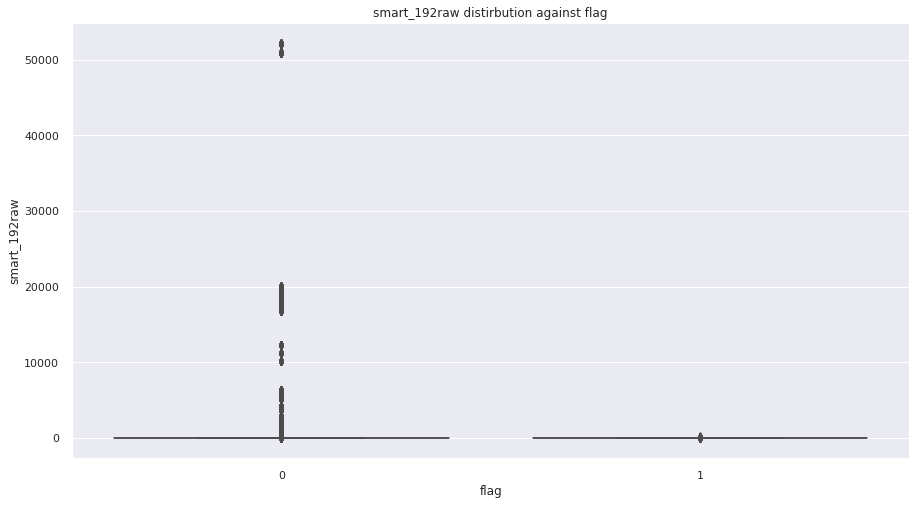

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193raw distirbution against flag')

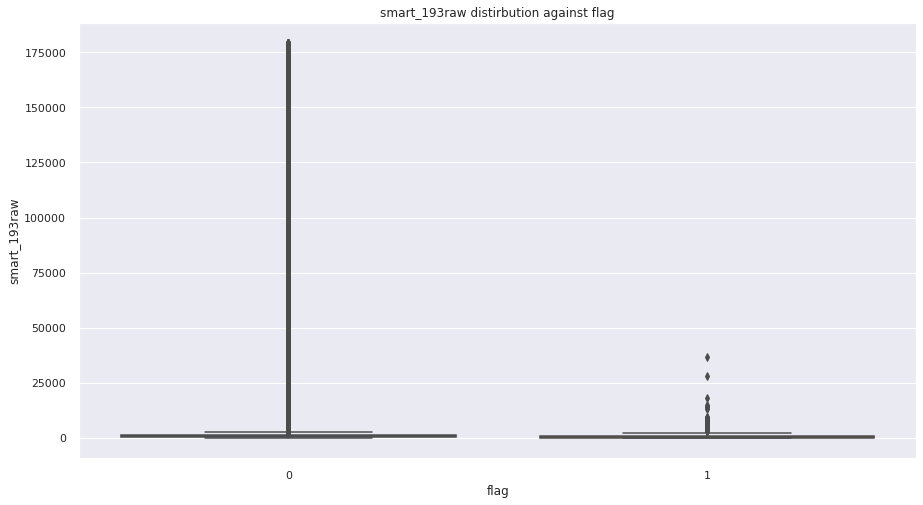

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194raw distirbution against flag')

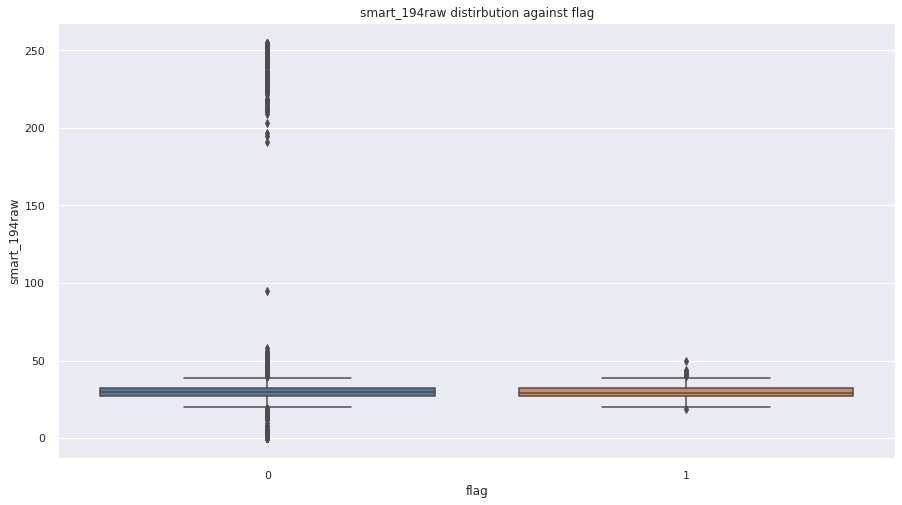

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195raw distirbution against flag')

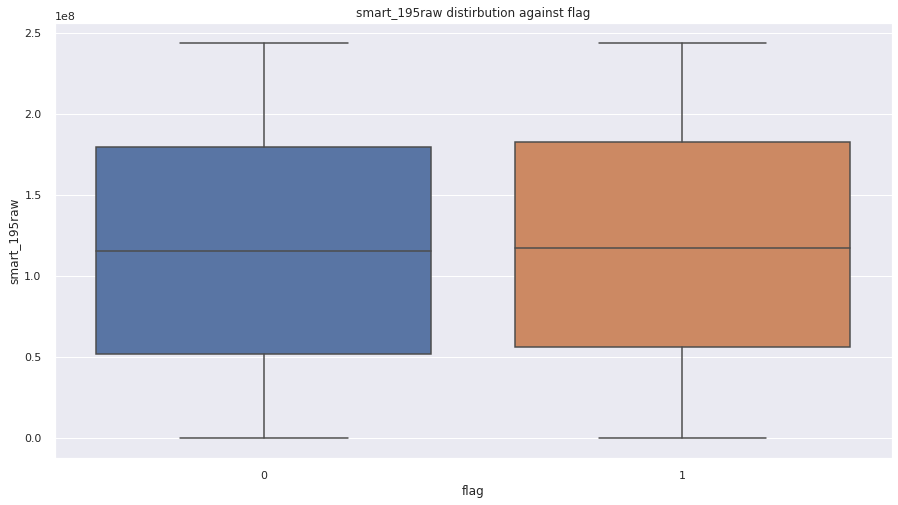

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197raw distirbution against flag')

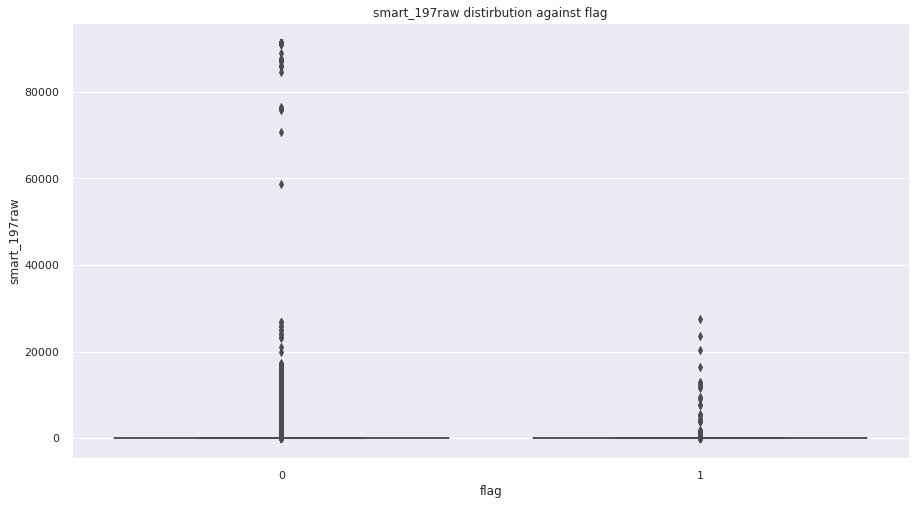

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198raw distirbution against flag')

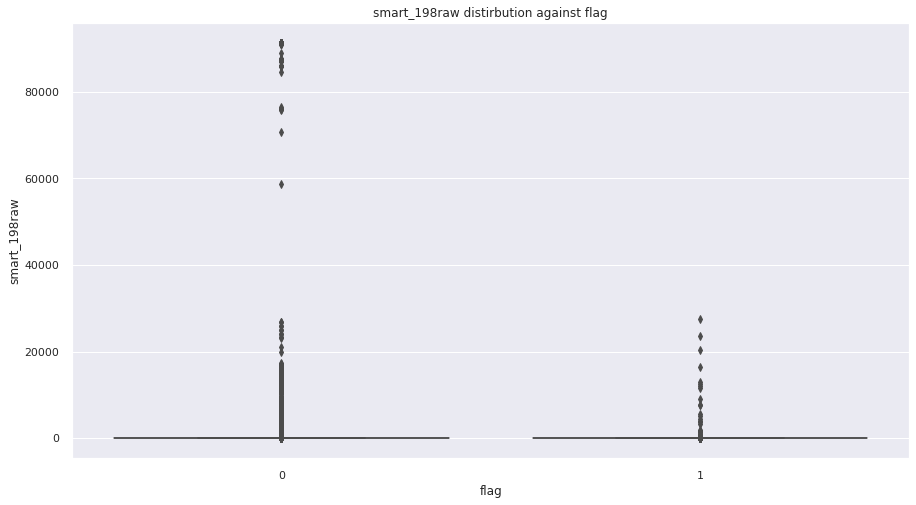

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199raw distirbution against flag')

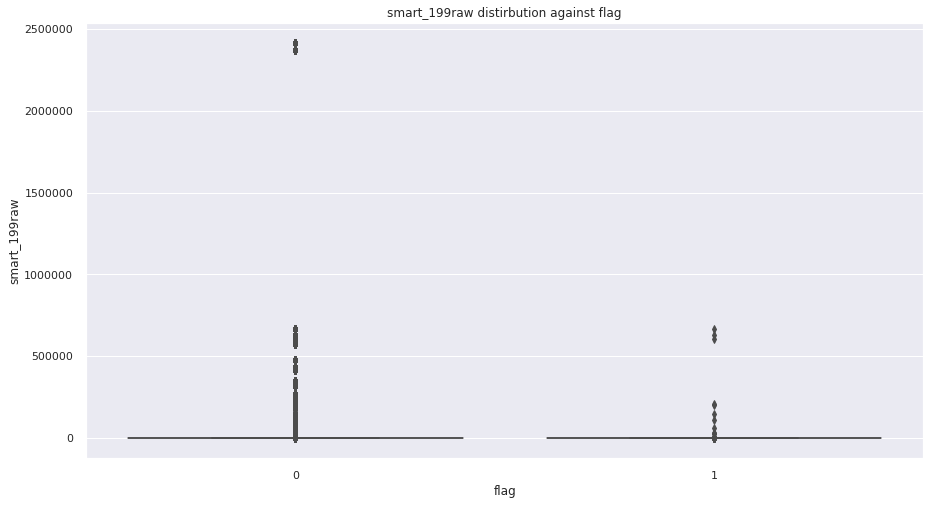

In [24]:
for cont_col in cont_cols:
    tmp_df = train_fe_df[[cont_col,'flag']]
    plt.figure(figsize=(15,8))
    sns.boxplot(x='flag', y=cont_col,  data=tmp_df)
    plt.title('%s distirbution against flag' % cont_col)
    plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1_normalized distirbution against tag')

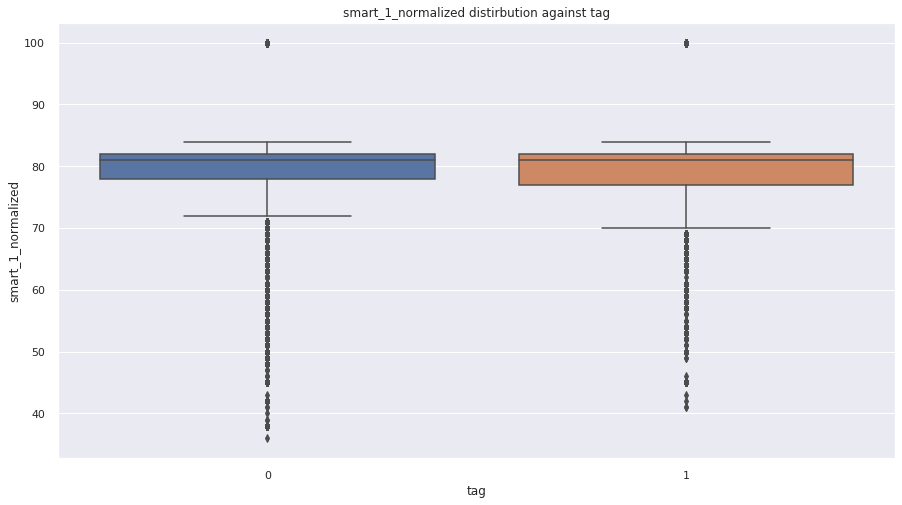

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3_normalized distirbution against tag')

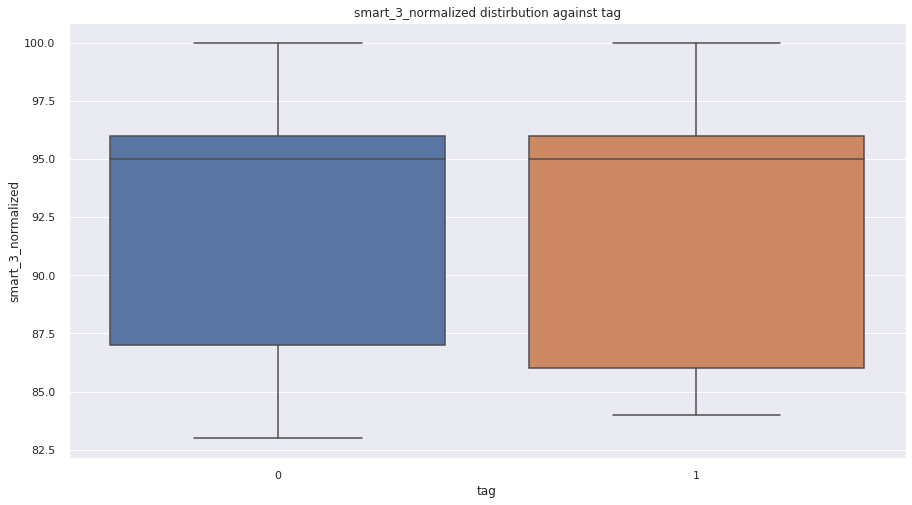

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4_normalized distirbution against tag')

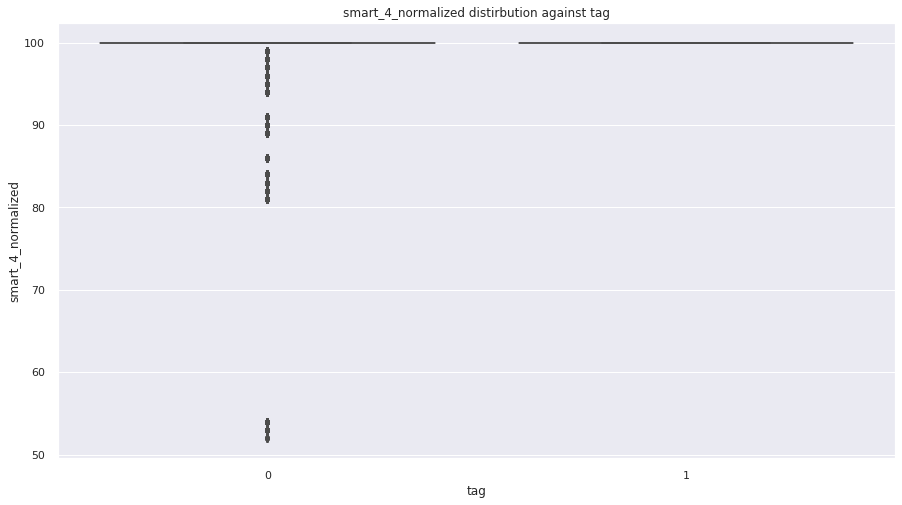

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5_normalized distirbution against tag')

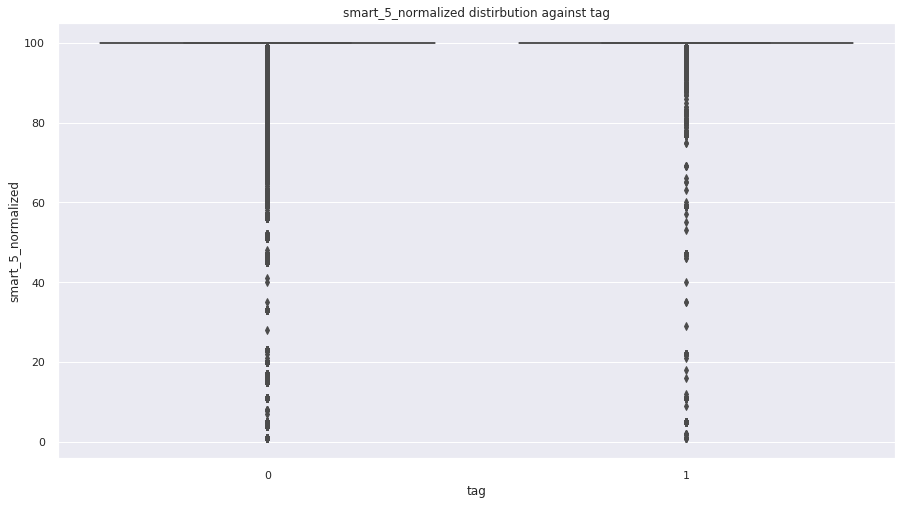

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7_normalized distirbution against tag')

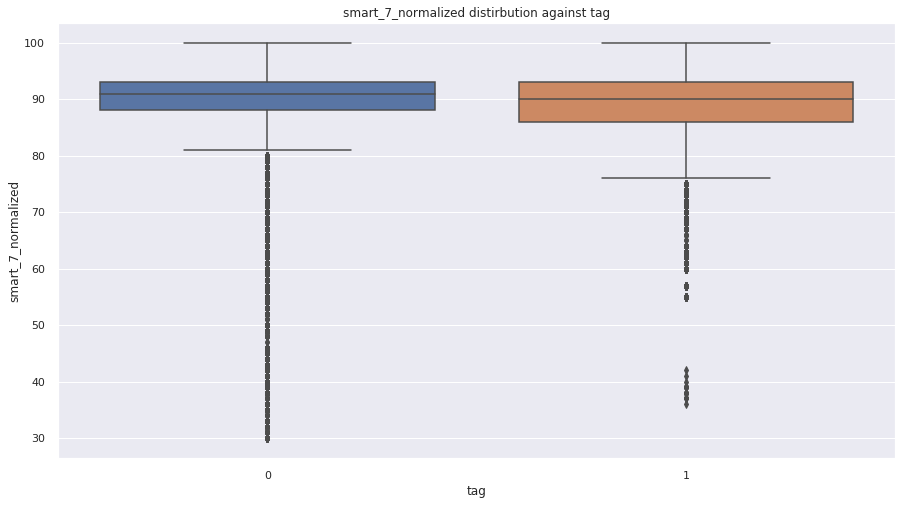

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9_normalized distirbution against tag')

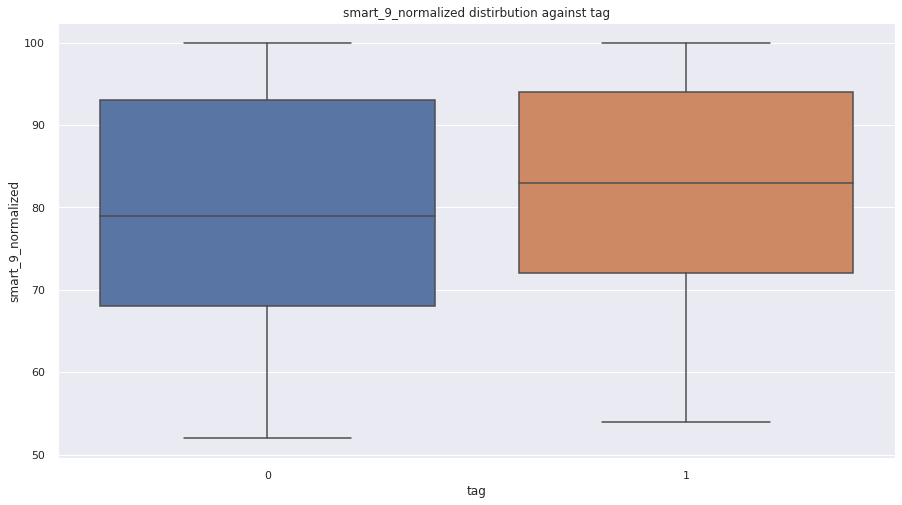

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10_normalized distirbution against tag')

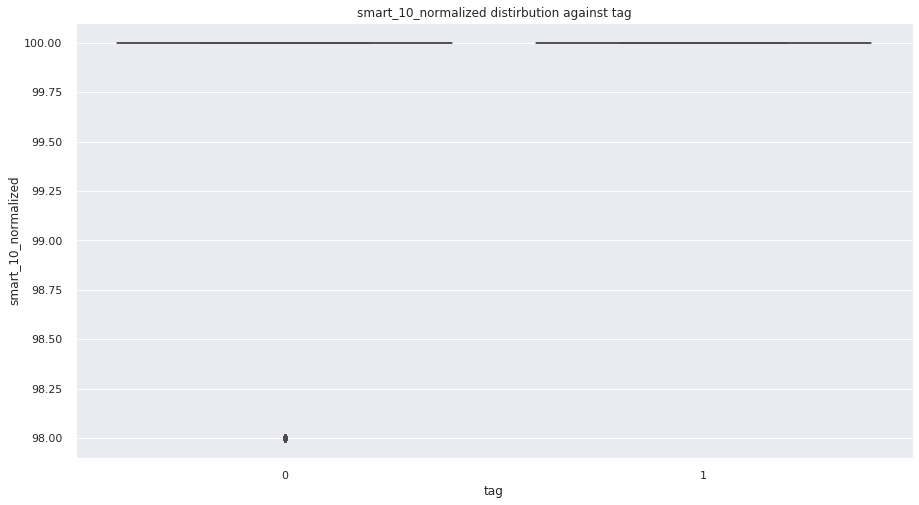

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12_normalized distirbution against tag')

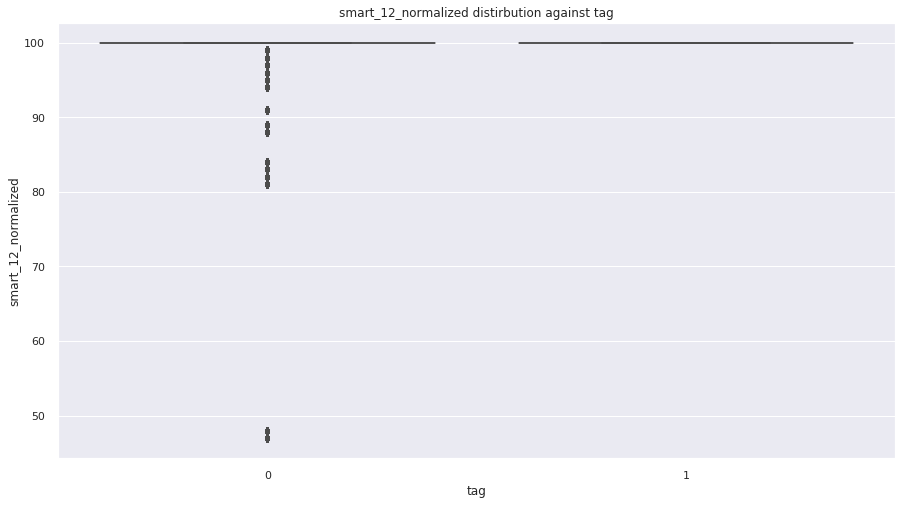

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184_normalized distirbution against tag')

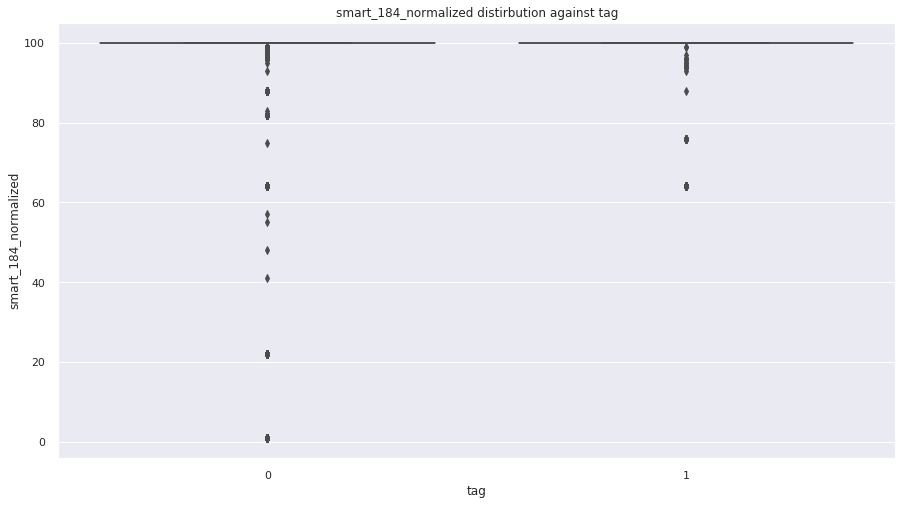

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187_normalized distirbution against tag')

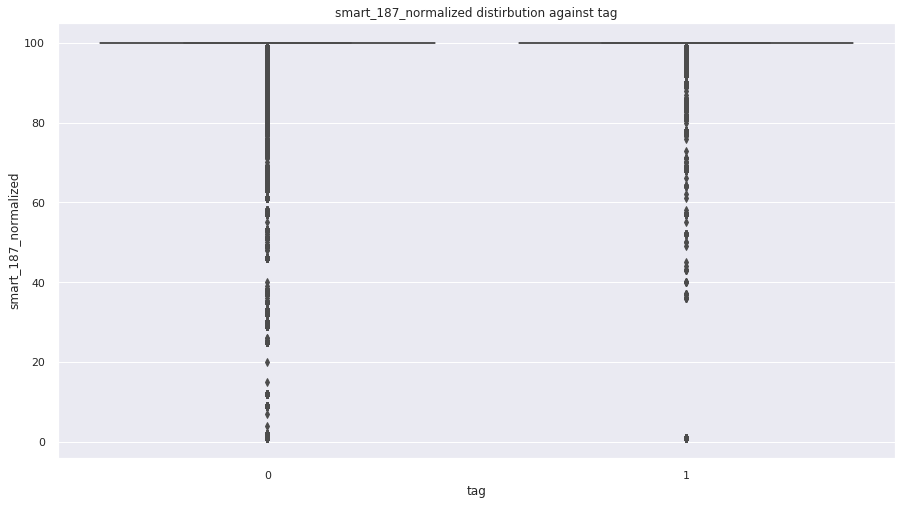

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188_normalized distirbution against tag')

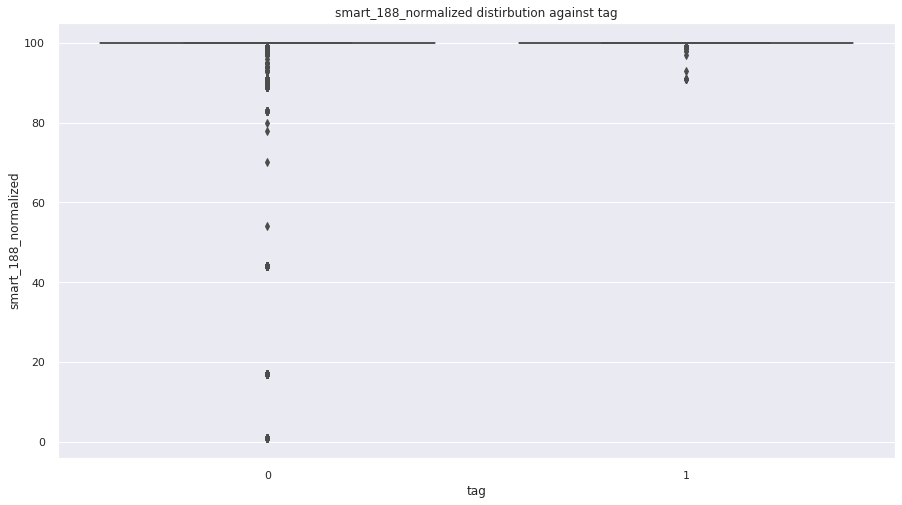

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189_normalized distirbution against tag')

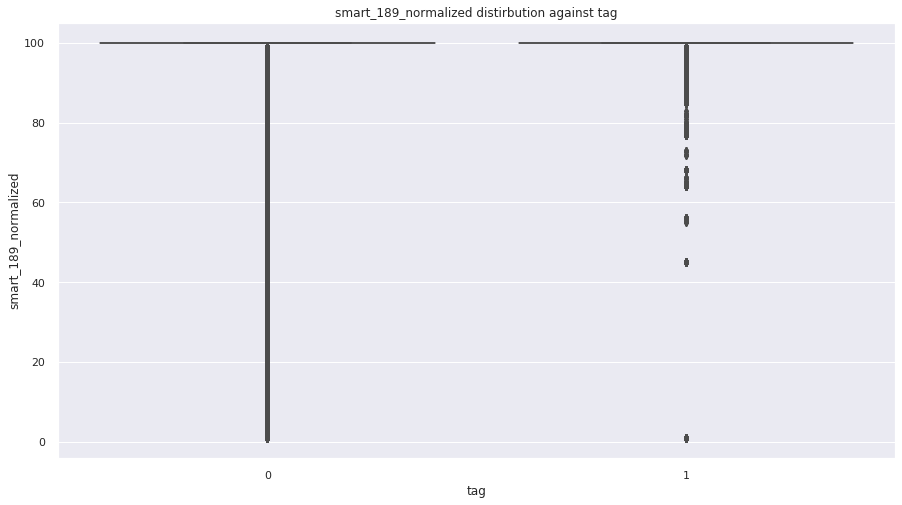

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190_normalized distirbution against tag')

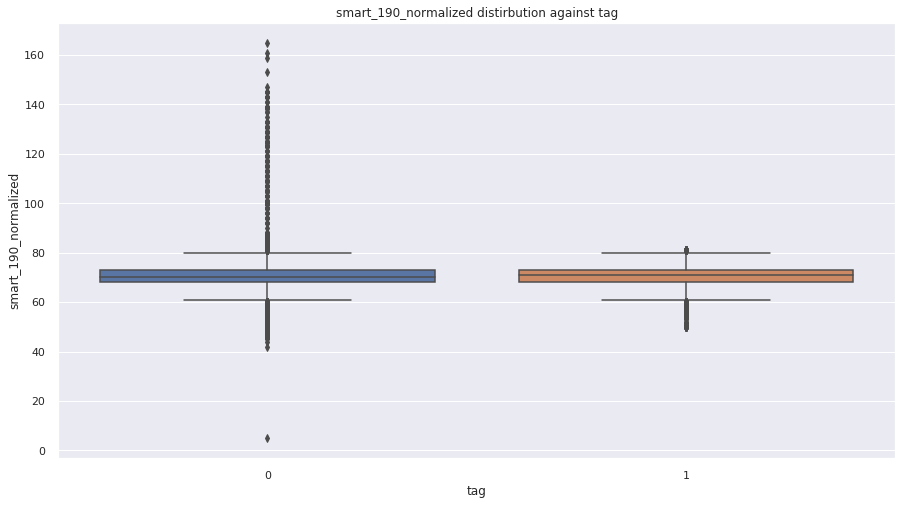

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191_normalized distirbution against tag')

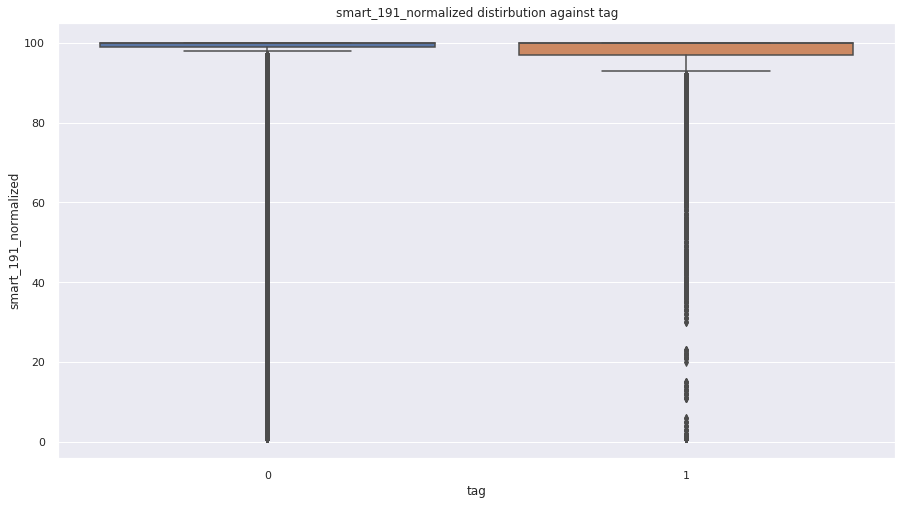

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192_normalized distirbution against tag')

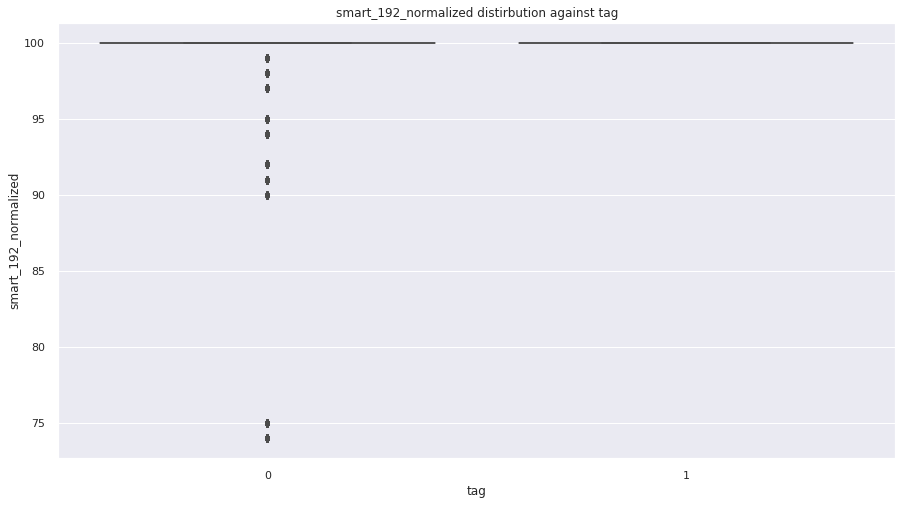

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193_normalized distirbution against tag')

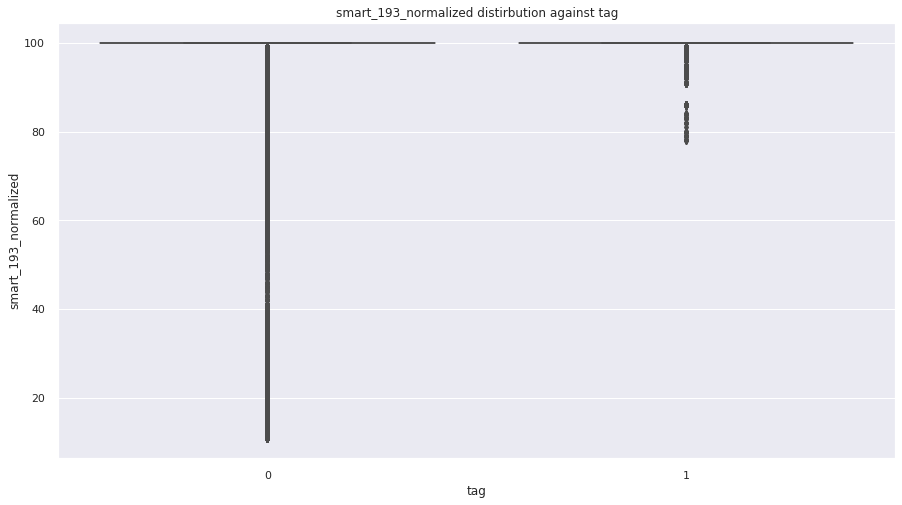

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194_normalized distirbution against tag')

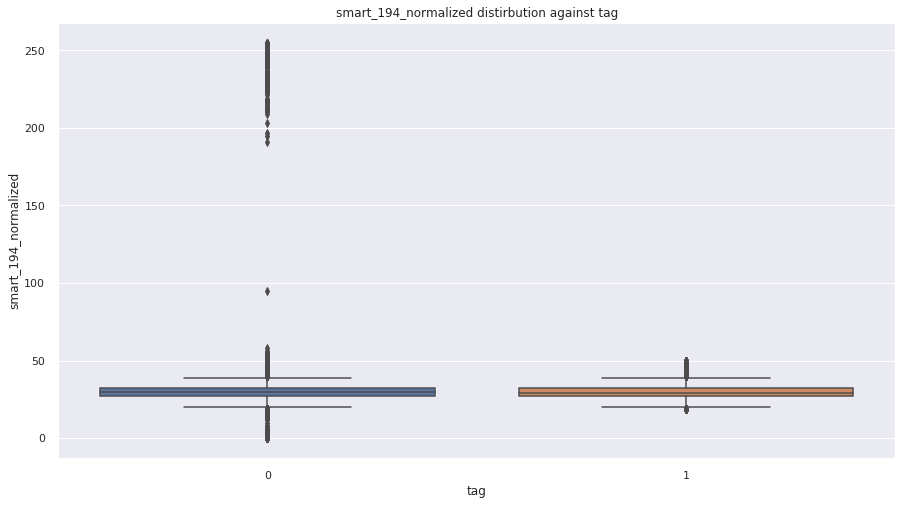

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195_normalized distirbution against tag')

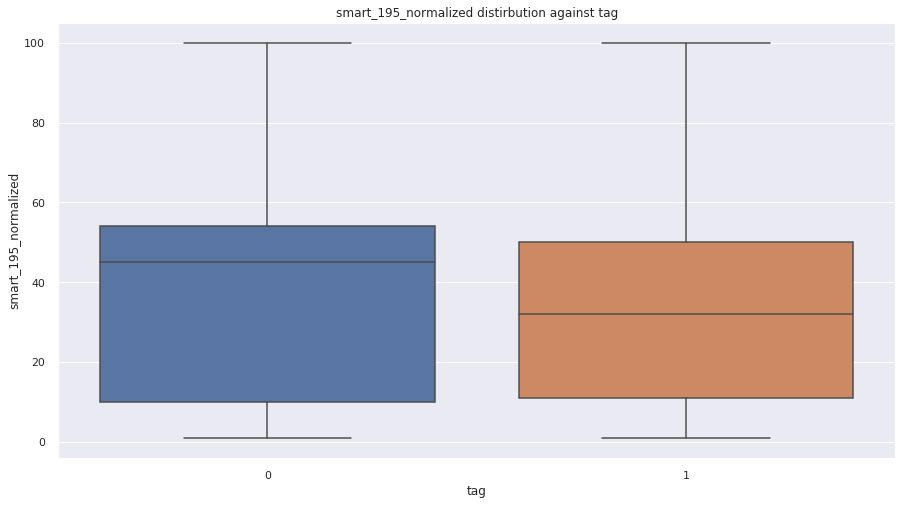

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197_normalized distirbution against tag')

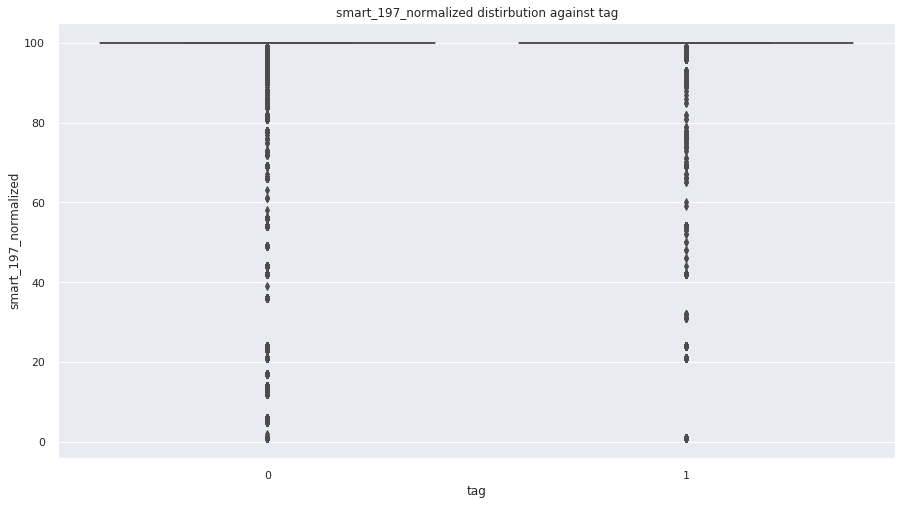

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198_normalized distirbution against tag')

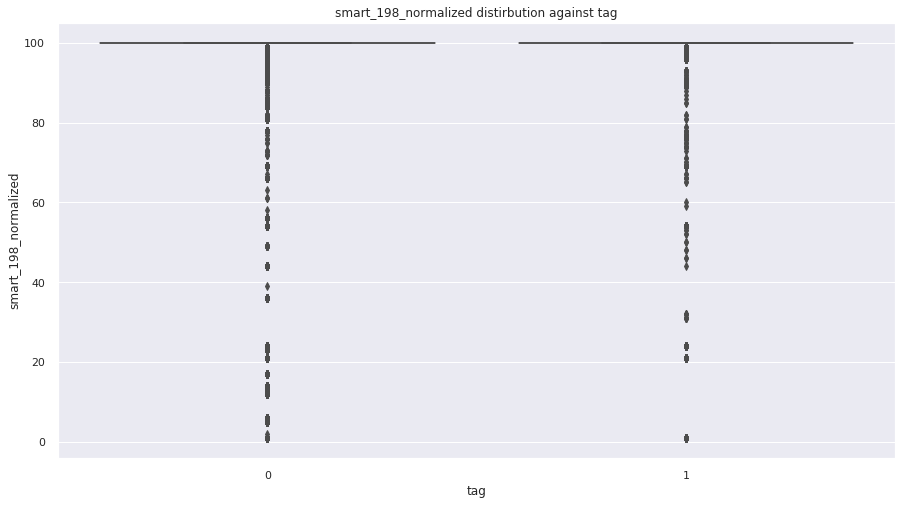

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199_normalized distirbution against tag')

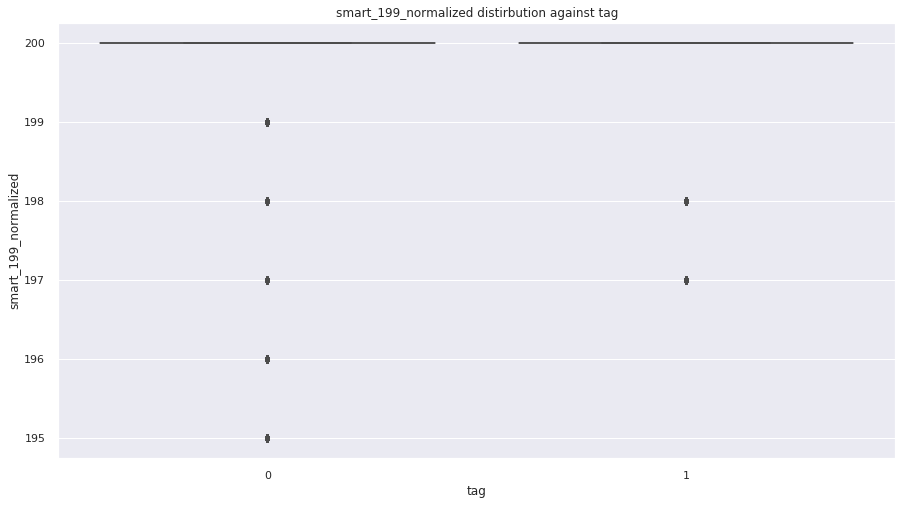

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1raw distirbution against tag')

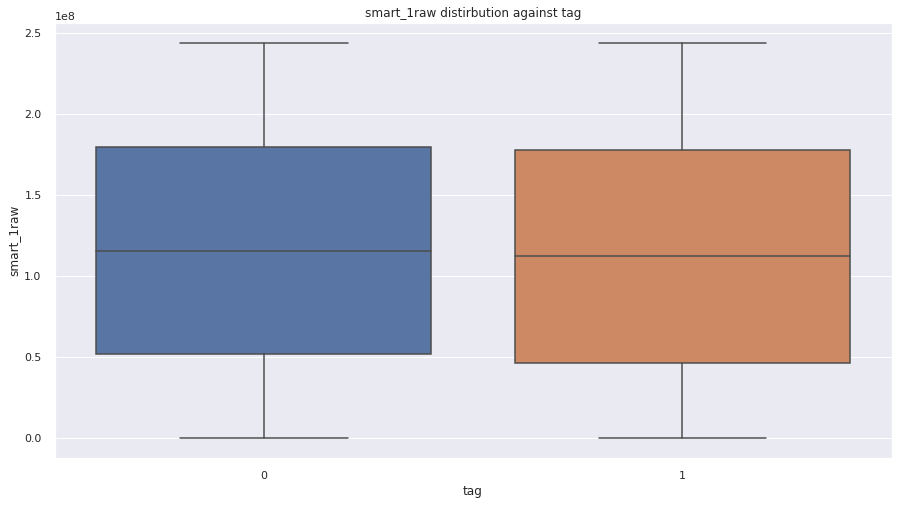

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3raw distirbution against tag')

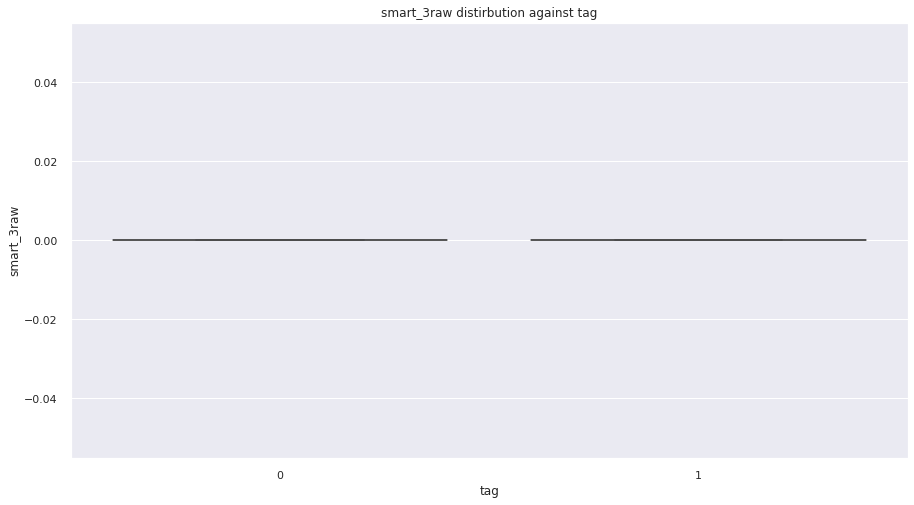

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4raw distirbution against tag')

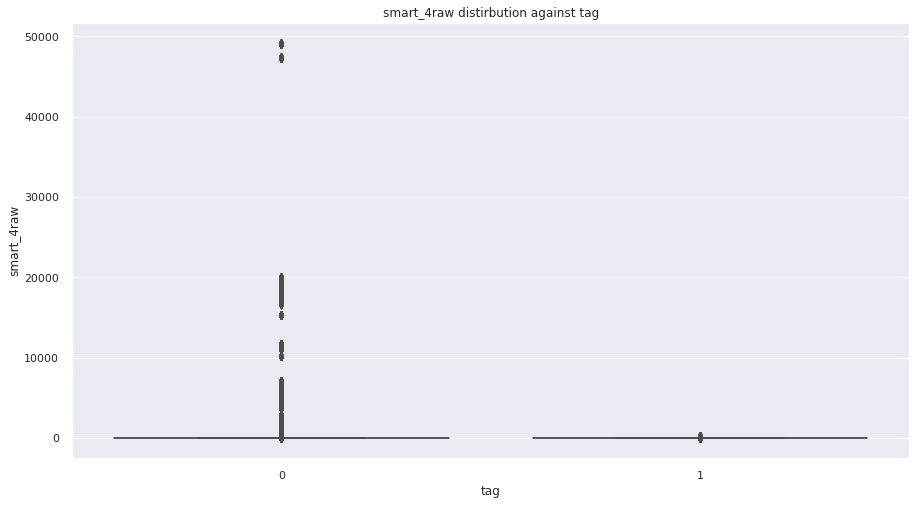

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5raw distirbution against tag')

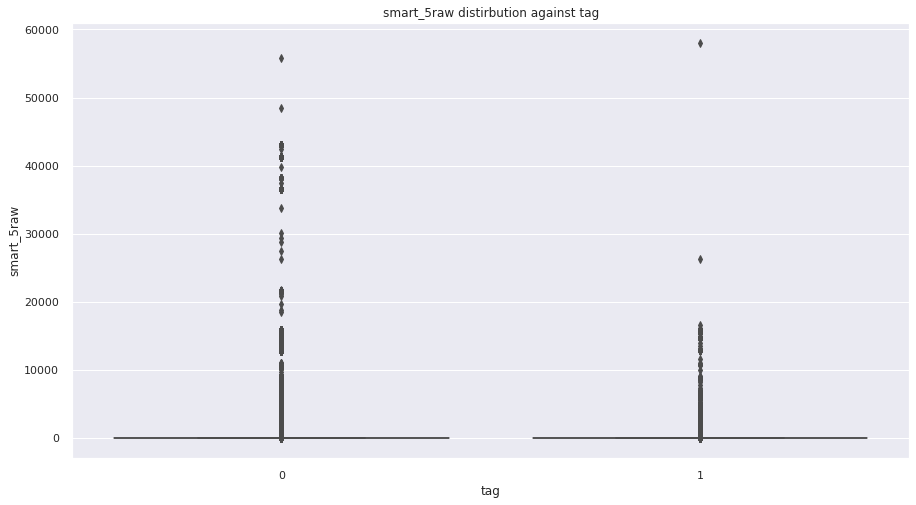

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7raw distirbution against tag')

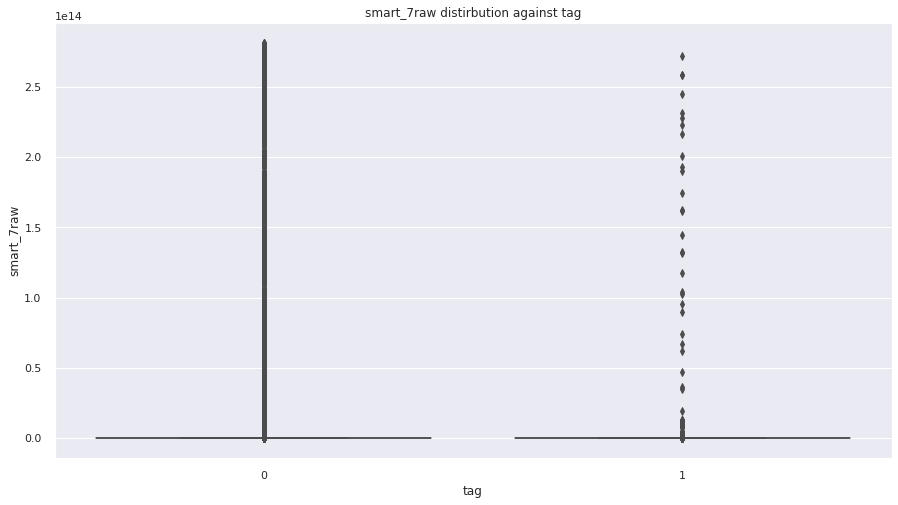

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9raw distirbution against tag')

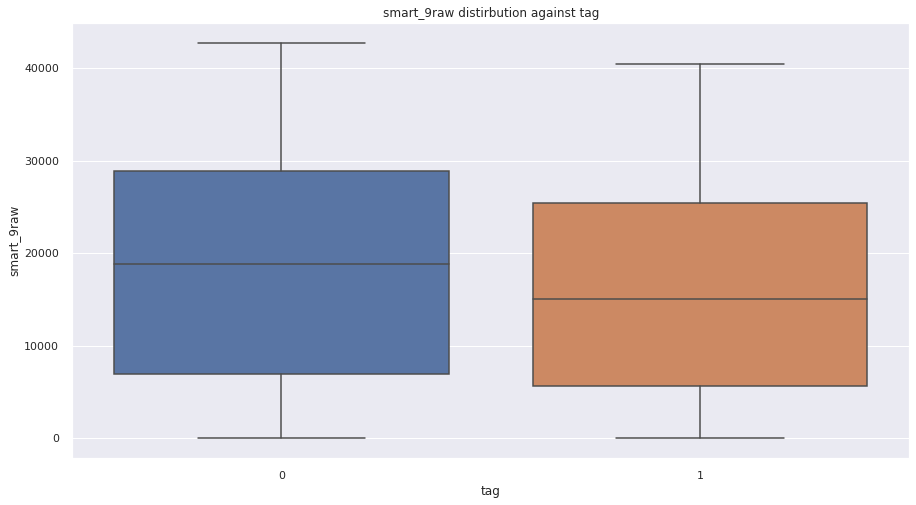

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10raw distirbution against tag')

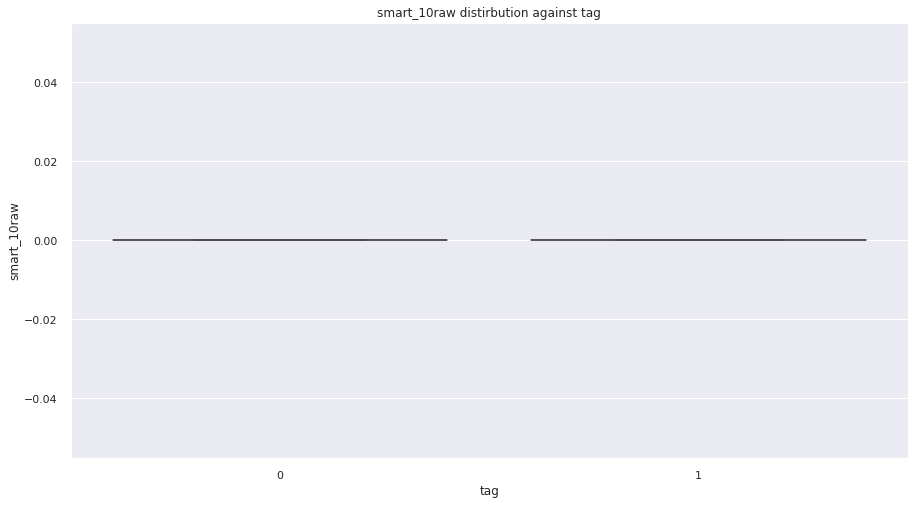

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12raw distirbution against tag')

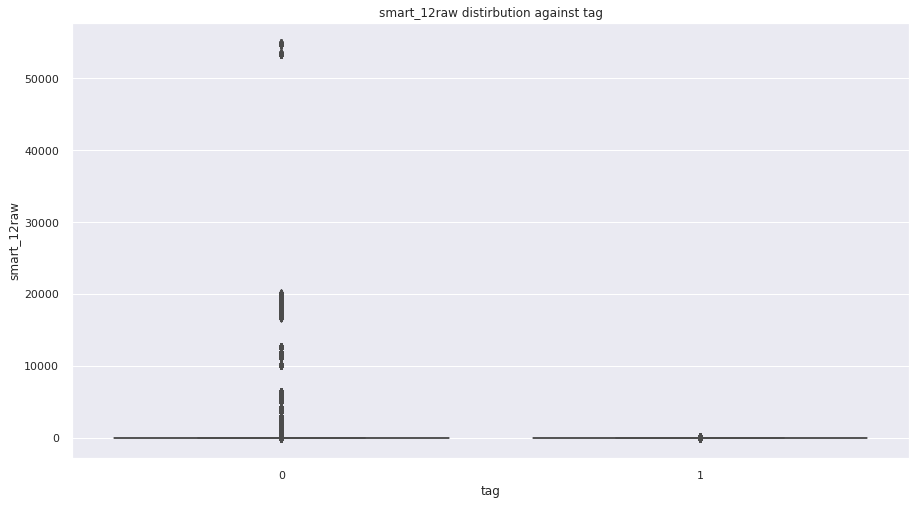

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184raw distirbution against tag')

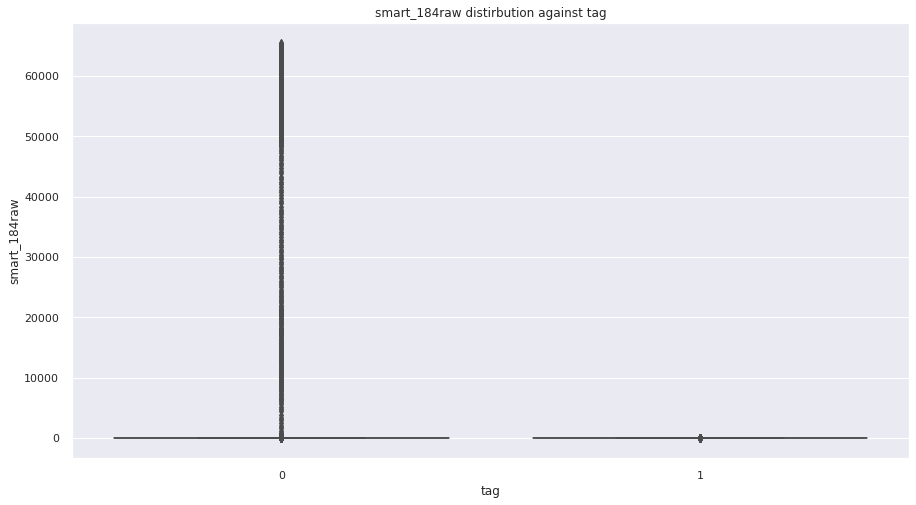

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187raw distirbution against tag')

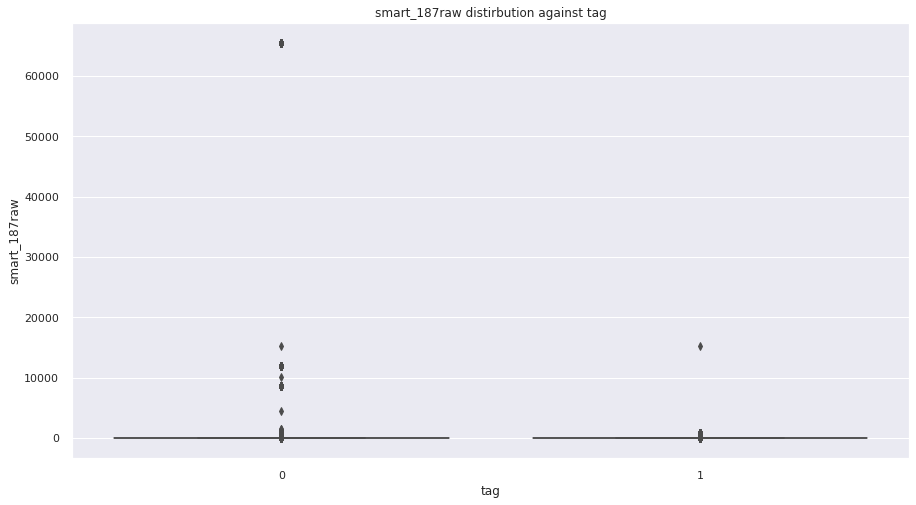

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188raw distirbution against tag')

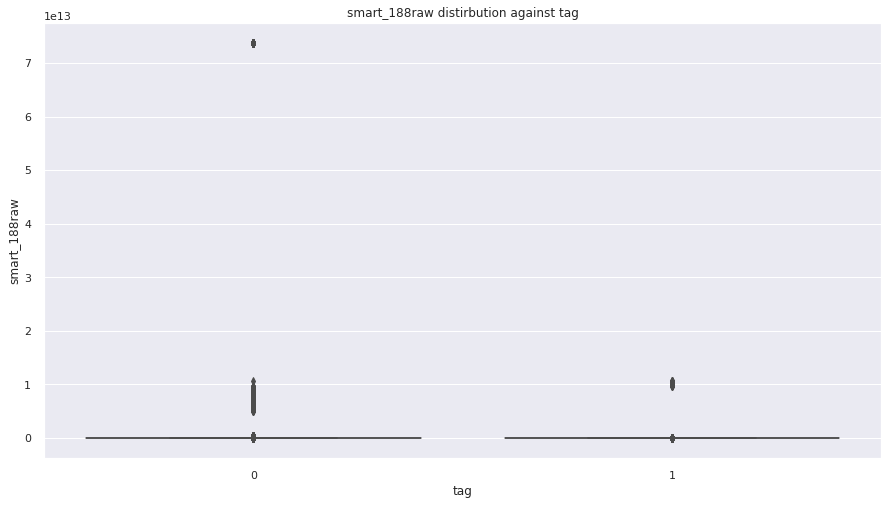

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189raw distirbution against tag')

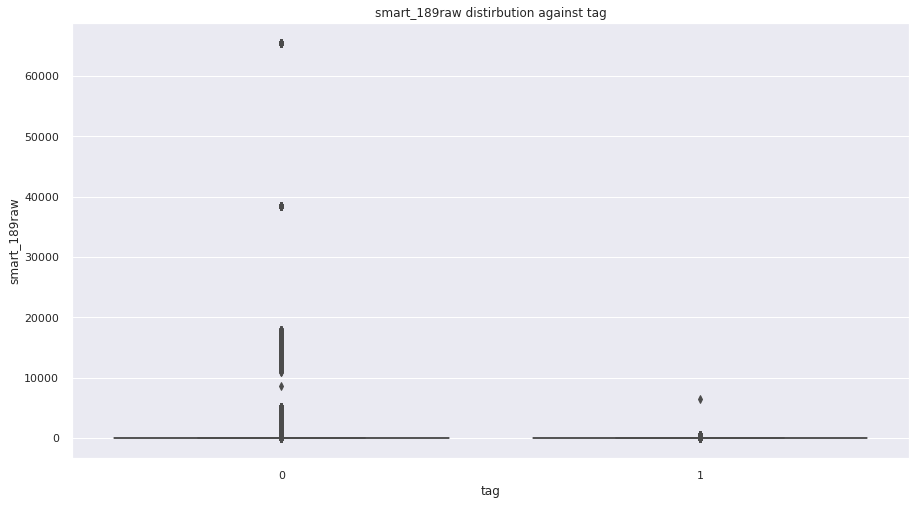

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190raw distirbution against tag')

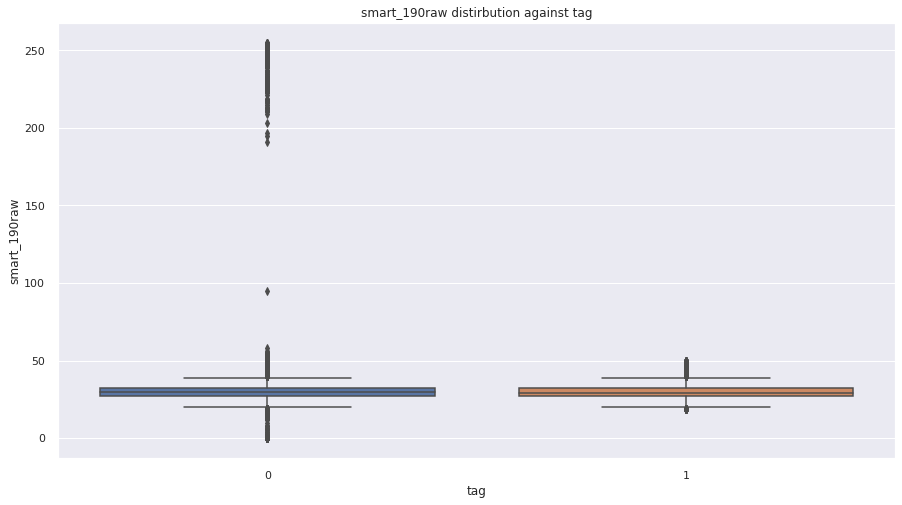

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191raw distirbution against tag')

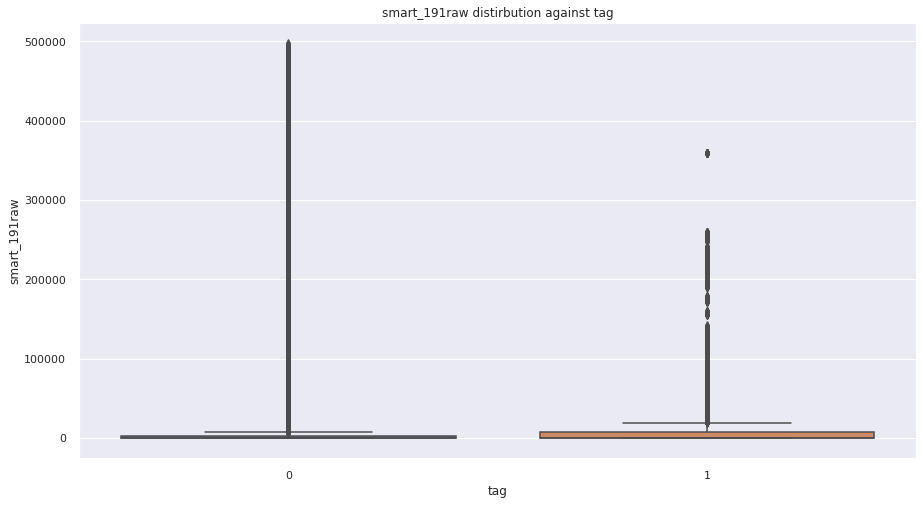

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192raw distirbution against tag')

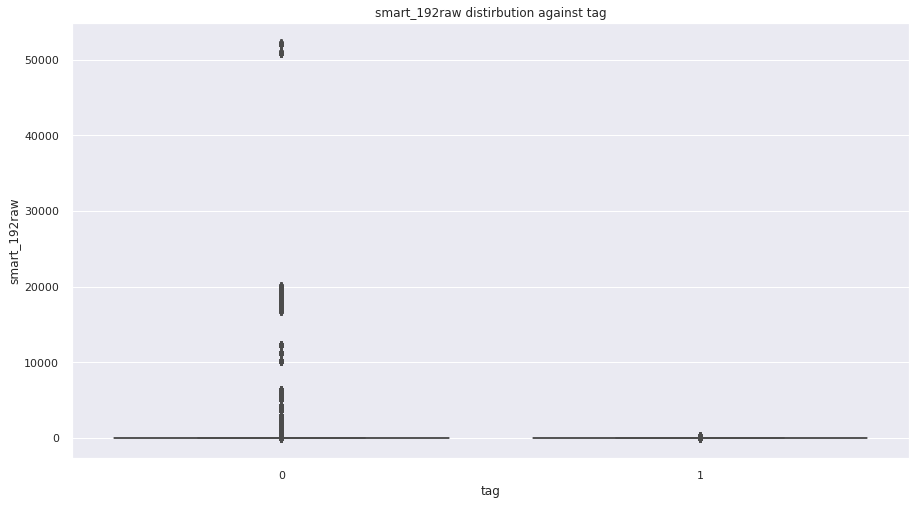

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193raw distirbution against tag')

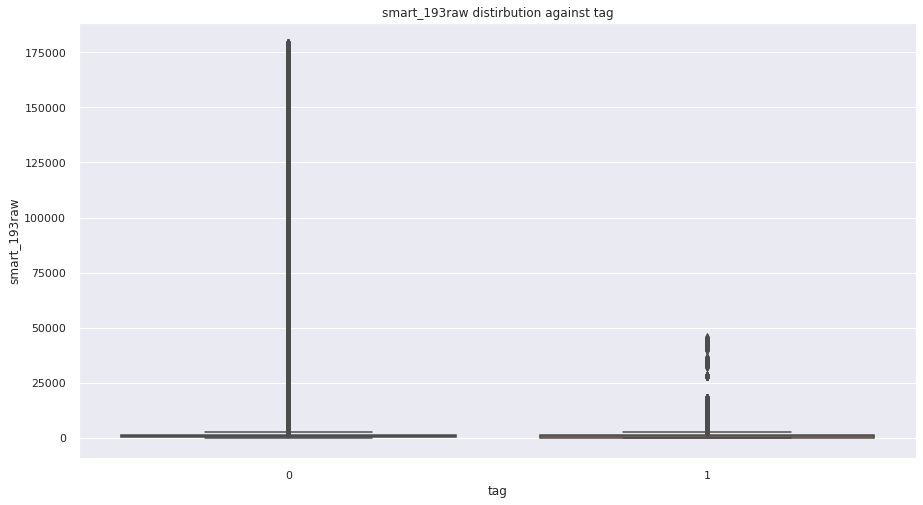

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194raw distirbution against tag')

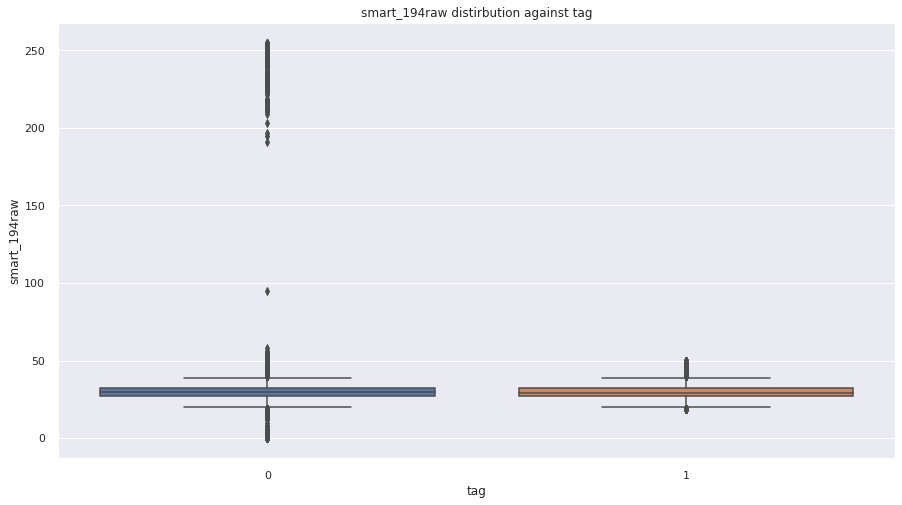

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195raw distirbution against tag')

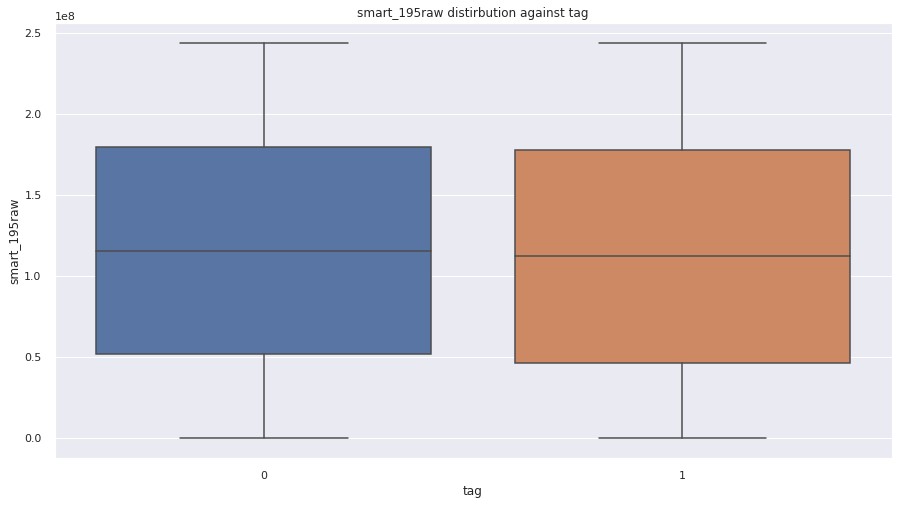

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197raw distirbution against tag')

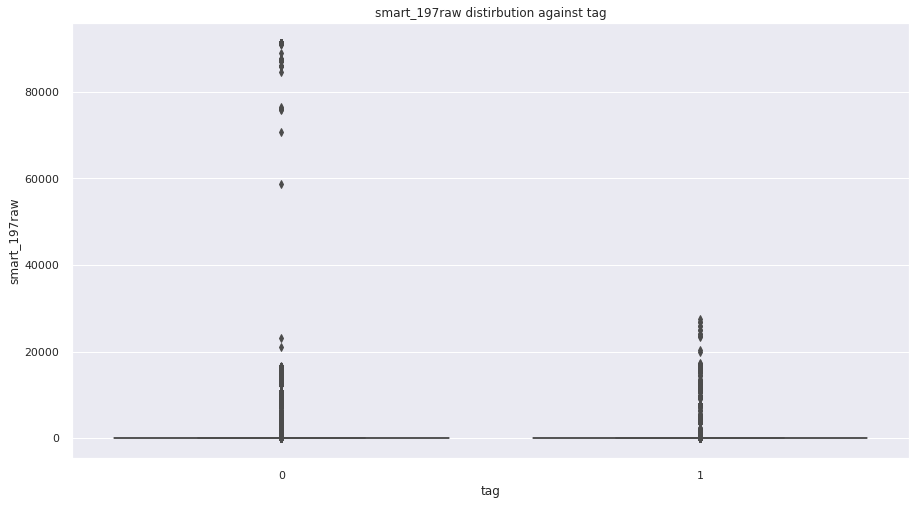

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198raw distirbution against tag')

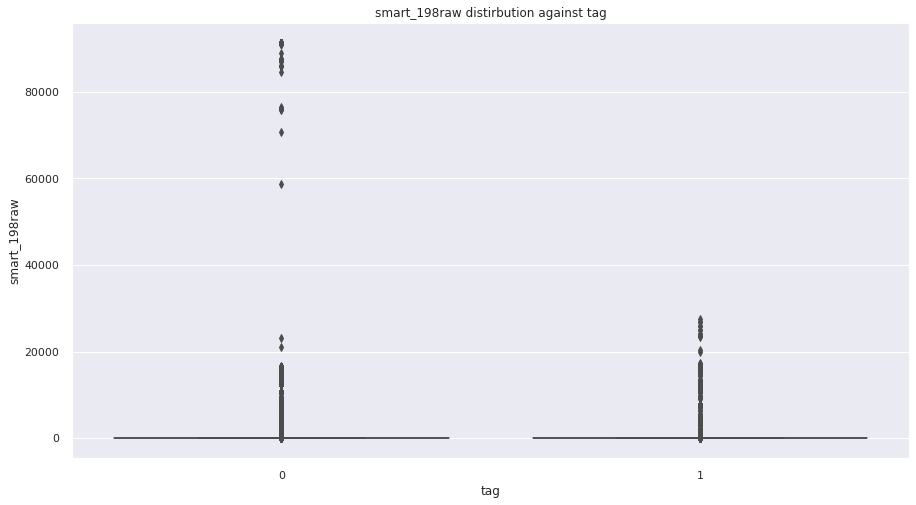

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199raw distirbution against tag')

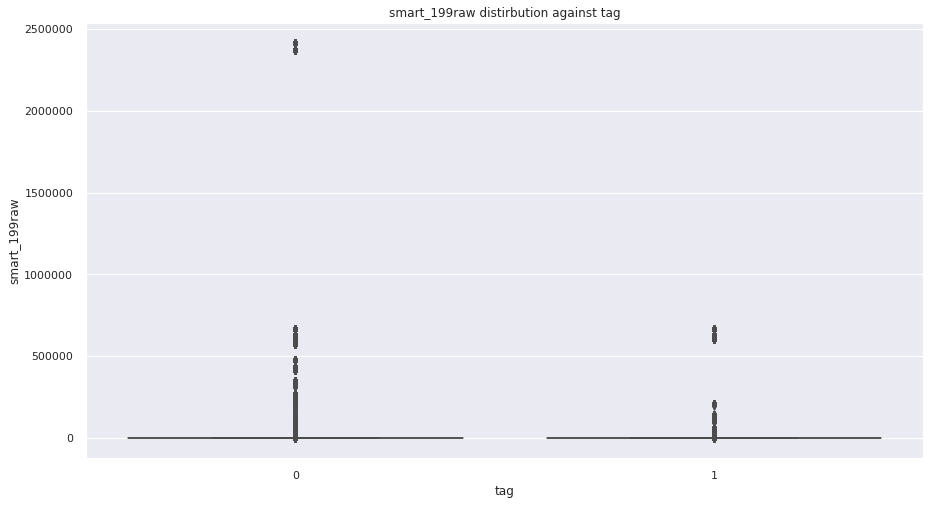

In [25]:
for cont_col in cont_cols:
    tmp_df = train_fe_df[[cont_col,'tag']]
    plt.figure(figsize=(15,8))
    sns.boxplot(x='tag', y=cont_col,  data=tmp_df)
    plt.title('%s distirbution against tag' % cont_col)
    plt.show()

In [ ]:
same_distribution_cols = ['smart_4_normalized', 'smart_5_normalized', 'smart_10_normalized',
                          'smart_12_normalized', 'smart_184_normalized', 'smart_184_normalized',
                          'smart_188_normalized', 'smart_189_normalized', 'smart_192_normalized',
                          'smart_193_normalized', 'smart_197_normalized', 'smart_198_normalized',
                          'smart_199_normalized', 'smart_3raw','smart_4raw', 'smart_5raw', 'smart_7raw',
                          'smart_10raw', 'smart_12raw', 'smart_184raw', 'smart_187raw',
                          'smart_188raw', 'smart_189raw', 'smart_192raw', 'smart_197raw',
                           'smart_198raw', 'smart_199raw']

In [ ]:
train_fe_df.tag.value_counts()

In [ ]:
for col in cont_cols:
    sns.kdeplot(train_fe_df[col],  label='train')
    sns.kdeplot(test_fe_df[col],  label='test')
    plt.legend()
    title = 'Distribution of %s between train(201801-201807) and test(201808)'%col
    plt.title(title)
    plt.savefig(os.path.join(conf.FIGURE_DIR, title))
    plt.show()

In [ ]:
train_fe_df[]

In [ ]:
cols_with_small_std = ['smart_4_normalized',
                       'smart_5_normalized',
                       'smart_12_normalized',
                       'smart_187_normalized',
                       'smart_188_normalized',
                       'smart_189_normalized',
                       'smart_193_normalized',
                       'smart_197_normalized',
                       'smart_198_normalized',
                       'smart_4raw',
                       'smart_5raw',
                       'smart_7raw',
                       'smart_12raw',
                       'smart_184raw',
                       'smart_187raw',
                       'smart_188raw',
                       'smart_189raw',
                       'smart_192raw',
                      '']

In [ ]:
log_func = lambda x : np.log(x) if x!=0 else 0
for col in cont_cols:
    sns.kdeplot(train_fe_df[col].apply(log_func),  label='train_log')
    sns.kdeplot(test_fe_df[col].apply(log_func),  label='test_log')
    plt.legend()
    title = 'Log Distribution of %s between train(201801-201807) and test(201808)'%col
    plt.title(title)
    plt.savefig(os.path.join(conf.FIGURE_DIR, title))
    plt.show()

In [ ]:
fault_df = train_fe_df[train_fe_df.flag==1]

In [ ]:
normal_df = train_fe_df[train_fe_df.flag==0]

In [ ]:
fault_df.head()

In [ ]:
for col in cont_cols:
    print(col)
    print(ks_2samp(fault_df[col],normal_df[col]))

In [ ]:
for col in cont_cols:
    print(col)
    print(len(train_df[col].unique()))
    print(len(test_df[col].unique()))
    print(train_df[[col]].apply(max))
    print(test_df[[col]].apply(max))
    print(train_df[[col]].apply(min))
    print(test_df[[col]].apply(min))

### <a id='4'> 4. check the correlation between feature and targets</a>

In [12]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError(
            'cannot handle data conversion of type: {} to {}'.format(
                type(data), to))
    else:
        return converted


def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]


def replace_nan_with_value(x, y, value):
    x = [v if v == v and v is not None else value for v in x]  # NaN != NaN
    y = [v if v == v and v is not None else value for v in y]
    return x, y

In [13]:
import math
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
# from dython._private import (
#     convert, remove_incomplete_samples, replace_nan_with_value
# )

REPLACE = 'replace'
DROP = 'drop'
DROP_SAMPLES = 'drop_samples'
DROP_FEATURES = 'drop_features'
SKIP = 'skip'
DEFAULT_REPLACE_VALUE = 0.0


def conditional_entropy(x,
                        y,
                        nan_strategy=REPLACE,
                        nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    **Returns:** float
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy


def cramers_v(x,
              y,
              nan_strategy=REPLACE,
              nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical
    Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def theils_u(x,
             y,
             nan_strategy=REPLACE,
             nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


def correlation_ratio(categories,
                      measurements,
                      nan_strategy=REPLACE,
                      nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates the Correlation Ratio (sometimes marked by the greek letter Eta)
    for categorical-continuous association.
    Answers the question - given a continuous value of a measurement, is it
    possible to know which category is it associated with?
    Value is in the range [0,1], where 0 means a category cannot be determined
    by a continuous measurement, and 1 means a category can be determined with
    absolute certainty.
    Wikipedia: https://en.wikipedia.org/wiki/Correlation_ratio
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    categories : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    measurements : list / NumPy ndarray / Pandas Series
        A sequence of continuous measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        categories, measurements = replace_nan_with_value(
            categories, measurements, nan_replace_value)
    elif nan_strategy == DROP:
        categories, measurements = remove_incomplete_samples(
            categories, measurements)
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta


def identify_nominal_columns(dataset, include=['object', 'category']):
    """Given a dataset, identify categorical columns.
    Parameters:
    -----------
    dataset : a pandas dataframe
    include : which column types to filter by; default: ['object', 'category'])
    Returns:
    --------
    categorical_columns : a list of categorical columns
    Example:
    --------
    >> df = pd.DataFrame({'col1': ['a', 'b', 'c', 'a'], 'col2': [3, 4, 2, 1]})
    >> identify_nominal_columns(df)
    ['col1']
    """
    dataset = convert(dataset, 'dataframe')
    nominal_columns = list(dataset.select_dtypes(include=include).columns)
    return nominal_columns


def associations(dataset,
                 nominal_columns='auto',
                 mark_columns=False,
                 theil_u=False,
                 plot=True,
                 return_results=False,
                 clustering=False,
                 nan_strategy=REPLACE,
                 nan_replace_value=DEFAULT_REPLACE_VALUE,
                 ax=None,
                 **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set
    with both categorical (eda_tools) and continuous features using:
     * Pearson's R for continuous-continuous cases
     * Correlation Ratio for categorical-continuous cases
     * Cramer's V or Theil's U for categorical-categorical cases
    **Returns:** a DataFrame of the correlation/strength-of-association between
    all features
    **Example:** see `associations_example` under `dython.examples`
    Parameters
    ----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    nominal_columns : string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can
        also be the string 'all' to state that all columns are categorical,
        'auto' (default) to try to identify nominal columns, or None to state
        none are categorical
    mark_columns : Boolean, default = False
        if True, output's columns' names will have a suffix of '(nom)' or
        '(con)' based on there type (eda_tools or continuous), as provided
        by nominal_columns
    theil_u : Boolean, default = False
        In the case of categorical-categorical feaures, use Theil's U instead
        of Cramer's V
    plot : Boolean, default = True
        If True, plot a heat-map of the correlation matrix
    return_results : Boolean, default = False
        If True, the function will return a Pandas DataFrame of the computed
        associations
    clustering : Boolean, default = False
        If True, hierarchical clustering is applied in order to sort
        features into meaningful groups
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove
        samples with missing values, 'drop_features' to remove features
        (columns) with missing values, or 'replace' to replace all missing
        values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'
    ax : matplotlib ax, default = None
      Matplotlib Axis on which the heat-map will be plotted
    kwargs : any key-value pairs
        Arguments to be passed to used function and methods
    """
    dataset = convert(dataset, 'dataframe')
    if nan_strategy == REPLACE:
        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    elif nominal_columns == 'auto':
        nominal_columns = identify_nominal_columns(dataset)

    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(
                                dataset[columns[i]],
                                dataset[columns[j]],
                                nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = theils_u(
                                dataset[columns[j]],
                                dataset[columns[i]],
                                nan_strategy=SKIP)
                        else:
                            cell = cramers_v(dataset[columns[i]],
                                             dataset[columns[j]],
                                             nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]],
                                                 dataset[columns[j]],
                                                 nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]],
                                                 dataset[columns[i]],
                                                 nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]],
                                              dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = [
            '{} (nom)'.format(col)
            if col in nominal_columns else '{} (con)'.format(col)
            for col in columns
        ]
        corr.columns = marked_columns
        corr.index = marked_columns
    if clustering:
        corr, _ = cluster_correlations(corr)
    if plot:
        if ax is None:
            plt.figure(figsize=kwargs.get('figsize', None))
        sns.heatmap(
            corr,
            cmap=kwargs.get('cmap', None),
            annot=kwargs.get('annot', True),
            fmt=kwargs.get('fmt', '.2f'),
            ax=ax
        )
        if ax is None:
            plt.show()
    if return_results:
        return corr


def numerical_encoding(dataset,
                       nominal_columns='auto',
                       drop_single_label=False,
                       drop_fact_dict=True,
                       nan_strategy=REPLACE,
                       nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Encoding a data-set with mixed data (numerical and categorical) to a
    numerical-only data-set using the following logic:
    * categorical with only a single value will be marked as zero (or dropped,
        if requested)
    * categorical with two values will be replaced with the result of Pandas
        `factorize`
    * categorical with more than two values will be replaced with the result
        of Pandas `get_dummies`
    * numerical columns will not be modified
    **Returns:** DataFrame or (DataFrame, dict). If `drop_fact_dict` is True,
    returns the encoded DataFrame.
    else, returns a tuple of the encoded DataFrame and dictionary, where each
    key is a two-value column, and the value is the original labels, as
    supplied by Pandas `factorize`. Will be empty if no two-value columns are
    present in the data-set
    Parameters
    ----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set to encode
    nominal_columns : sequence / string. default = 'all'
        A sequence of the nominal (categorical) columns in the dataset. If
        string, must be 'all' to state that all columns are nominal. If None,
        nothing happens. If 'auto', categorical columns will be identified
        based on dtype.
    drop_single_label : Boolean, default = False
        If True, nominal columns with a only a single value will be dropped.
    drop_fact_dict : Boolean, default = True
        If True, the return value will be the encoded DataFrame alone. If
        False, it will be a tuple of the DataFrame and the dictionary of the
        binary factorization (originating from pd.factorize)
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove
        samples with missing values, 'drop_features' to remove features
        (columns) with missing values, or 'replace' to replace all missing
        values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan
        _strategy is set to 'replace'
    """
    dataset = convert(dataset, 'dataframe')
    if nan_strategy == REPLACE:
        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    if nominal_columns is None:
        return dataset
    elif nominal_columns == 'all':
        nominal_columns = dataset.columns
    elif nominal_columns == 'auto':
        nominal_columns = identify_nominal_columns(dataset)
    converted_dataset = pd.DataFrame()
    binary_columns_dict = dict()
    for col in dataset.columns:
        if col not in nominal_columns:
            converted_dataset.loc[:, col] = dataset[col]
        else:
            unique_values = pd.unique(dataset[col])
            if len(unique_values) == 1 and not drop_single_label:
                converted_dataset.loc[:, col] = 0
            elif len(unique_values) == 2:
                converted_dataset.loc[:, col], binary_columns_dict[
                    col] = pd.factorize(dataset[col])
            else:
                dummies = pd.get_dummies(dataset[col], prefix=col)
                converted_dataset = pd.concat([converted_dataset, dummies],
                                              axis=1)
    if drop_fact_dict:
        return converted_dataset
    else:
        return converted_dataset, binary_columns_dict


def cluster_correlations(corr_mat, indices=None):
    '''
    Apply agglomerative clustering in order to sort
    a correlation matrix.
    Based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb
    Parameters
    ----------
    - corr_mat : a square correlation matrix (pandas DataFrame)
    - indices : cluster labels [None]; if not provided we'll do
        an aglomerative clustering to get cluster labels.
    Returns
    -------
    - corr : a sorted correlation matrix
    - indices : cluster indexes based on the original dataset
    Example
    -------
    >> correlations = associations(
        customers,
        return_results=True,
        plot=False
    )
    >> correlations, _ = cluster_correlations(correlations)
    '''
    if indices is None:
        X = corr_mat.values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        indices = sch.fcluster(L, 0.5*d.max(), 'distance')
    columns = [corr_mat.columns.tolist()[i]
               for i in list((np.argsort(indices)))]
    corr_mat = corr_mat.reindex(columns=columns).reindex(index=columns)
    return corr_mat, indices

In [14]:
corr_with_tag = []
for cont_col in cont_cols:
    print('%s - %s with corr: %s'% (cont_col, 'tag',
        correlation_ratio(train_fe_df['tag'],train_fe_df[cont_col])))
    corr_with_tag += [correlation_ratio(train_fe_df['tag'],train_fe_df[cont_col])]

smart_1_normalized - tag with corr: 0.001793569649730121
smart_3_normalized - tag with corr: 0.005371779827061945
smart_4_normalized - tag with corr: 0.00027001315677893835
smart_5_normalized - tag with corr: 0.025405480586089168
smart_7_normalized - tag with corr: 0.007608552003575175
smart_9_normalized - tag with corr: 0.006656912986637751
smart_10_normalized - tag with corr: 0.00016770797959928535
smart_12_normalized - tag with corr: 0.00039436330338143906
smart_184_normalized - tag with corr: 0.002603266296899878
smart_187_normalized - tag with corr: 0.019948818219540792
smart_188_normalized - tag with corr: 8.509088794565456e-05
smart_189_normalized - tag with corr: 0.000819291032434751
smart_190_normalized - tag with corr: 0.0017559794542505226
smart_191_normalized - tag with corr: 0.006219389307833553
smart_192_normalized - tag with corr: 0.00025899134968609283
smart_193_normalized - tag with corr: 0.00154749211242284
smart_194_normalized - tag with corr: 0.0017337107666822434
s

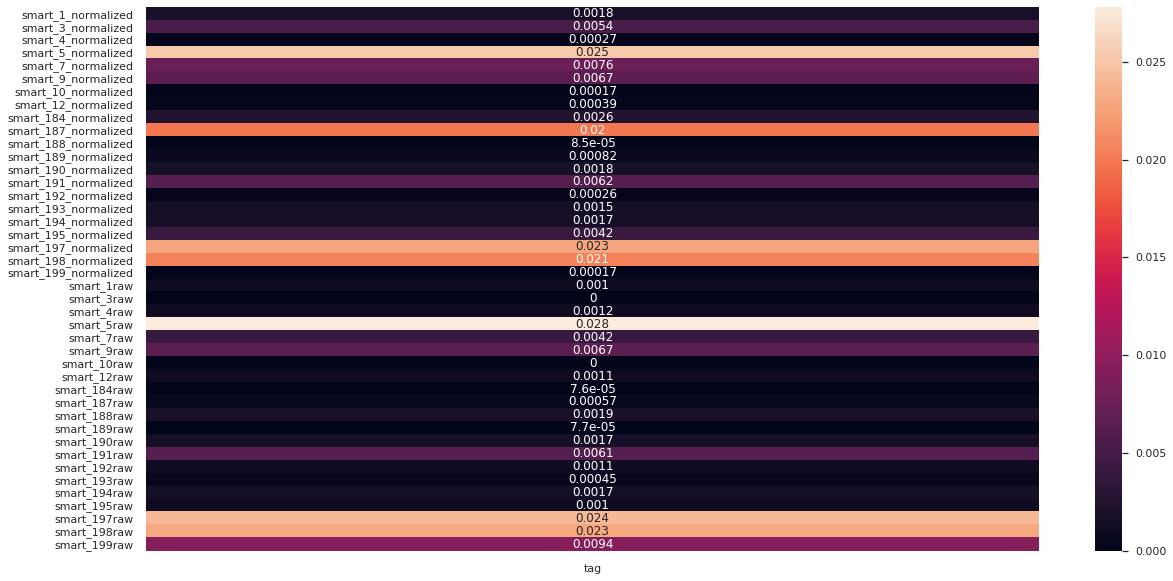

In [21]:
index = cont_cols
cols = ['tag']
sns.heatmap(pd.DataFrame(corr_with_tag, index=index, columns=cols),annot=True)

In [15]:
corr_with_flag = []
for cont_col in cont_cols:
    print('%s - %s with corr: %s'% (cont_col, 'flag',
        correlation_ratio(train_fe_df['flag'],train_fe_df[cont_col])))
    corr_with_flag += [correlation_ratio(train_fe_df['flag'],train_fe_df[cont_col])]

smart_1_normalized - flag with corr: 0.0012462983217835482
smart_3_normalized - flag with corr: 0.00099624533656315
smart_4_normalized - flag with corr: 8.132279280482937e-05
smart_5_normalized - flag with corr: 0.00787564681421673
smart_7_normalized - flag with corr: 0.0013284133766909541
smart_9_normalized - flag with corr: 0.0013729577642472327
smart_10_normalized - flag with corr: 3.0331292172545372e-05
smart_12_normalized - flag with corr: 7.132366990289412e-05
smart_184_normalized - flag with corr: 0.0006320041852562106
smart_187_normalized - flag with corr: 0.008689055094922418
smart_188_normalized - flag with corr: 0.000407780325489569
smart_189_normalized - flag with corr: 0.00023352154837719786
smart_190_normalized - flag with corr: 0.0002278293666176415
smart_191_normalized - flag with corr: 0.0012482958762712482
smart_192_normalized - flag with corr: 4.684059945309599e-05
smart_193_normalized - flag with corr: 0.0001810021069132044
smart_194_normalized - flag with corr: 0.0

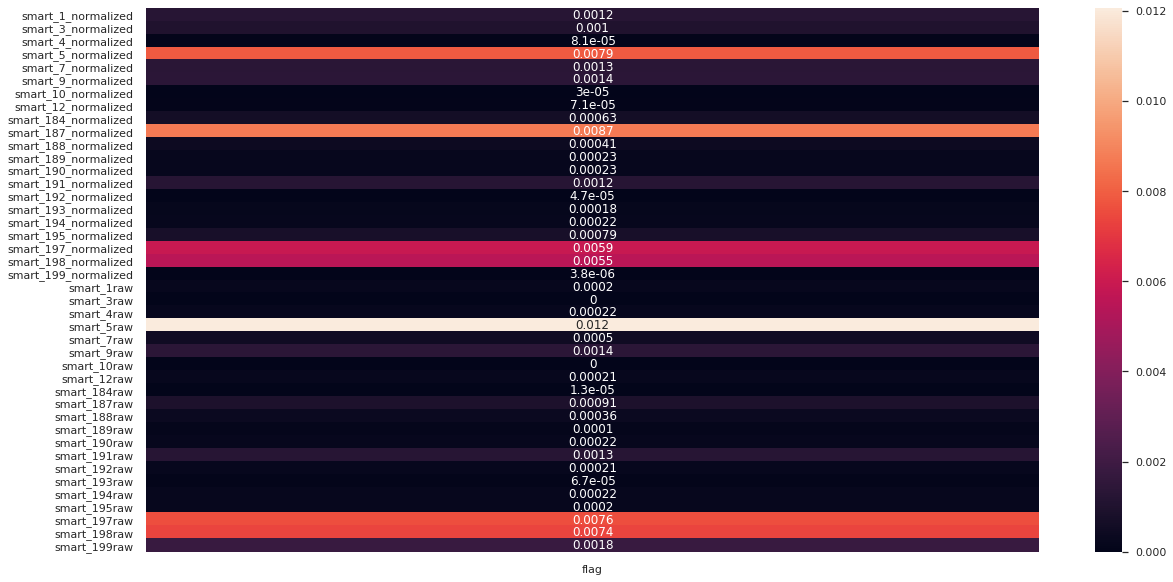

In [22]:
index = cont_cols
cols = ['flag']
sns.heatmap(pd.DataFrame(corr_with_flag, index=index, columns=cols),annot=True)